# Project Introdution:

Prelude:

I have avoided any speculative conclusions or assumptions about the individual under study in this report. There are certainly some patterns of behaviour observed from the data which are worth furthur investigation. However, there are certain mismatches,lack of consistent registered data and other issues, which if mixed with the personal biases of the data analyst could lead to hypothetical conclusions far from reality. 

One of the major issues with the data set, is the column "time_offset" that in some tables needs calibration.In order to verify whether to calibrate a particular table or not, I have visualized the table both with and without adjustments, and then reasoned that for example, a normal person is unlikely to exercise freuqently at 2 AM, so I have to time-adjust. However, in practice, the individual under study might be a night-shifter/nurse/etc that actually does have unusual daily routine hours.

Some tables such as step_count look like a disciplined form of logging activities (distance,calories, steps) for short term with no follow through. This is specially odd, since there are other mechanisms in place (e.g. exercise table, step daily trend) which could potentially register the same type of data. Simmilarly, one must wonder what extra information the calories table could provide which exercise table or other activity related tables could not carry/contain; are these overlapping data?  

The  data registered in some tables is measured by different devices, which is not ideal.


On this report:

section 2 includes Calling Tables, Pre Porcessing, cleaning, and writing the well-organized data into my personal directory

section 3 includes the charting,visualization and conclusions associated to certain figures

section 4 will be the overall summary

section 5 will be some experiments I am running for Dash and will need future additional work

# Calling the tables, adjusting, cleaning and writing the new version into my personal directory

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid
import matplotlib.patches as mpatches
fields_exercise=['start_time','end_time','duration', 'time_offset','exercise_type','calorie','distance','create_time','max_heart_rate','max_speed']
exercise= pd.read_csv('C:/users/hajyhass/downloads/healthdata/exercise.csv', sep=',', usecols=fields_exercise)
exercise['duration']=exercise['duration']/60000   ##Duration in minutes
exercise['time_offset_adj']=0
exercise['time_offset_adj'] = exercise['time_offset_adj'].astype(float)*1
exercise['start_time'] =pd.to_datetime(exercise['start_time'],format='%Y-%m-%d %H:%M:%S.%f')
exercise['end_time'] =pd.to_datetime(exercise['end_time'],format='%Y-%m-%d %H:%M:%S.%f')
exercise['create_time']=pd.to_datetime(exercise['create_time'],format='%Y-%m-%d %H:%M:%S.%f')
from datetime import timedelta
start_time_offset=[]
for i in range(len(exercise['start_time'])):
    start_time_offset.append(exercise['start_time'][i]-timedelta(hours=exercise['time_offset_adj'][i]))
exercise['start_time']=start_time_offset

end_time_offset=[]
for i in range(len(exercise['end_time'])):
    end_time_offset.append(exercise['end_time'][i]-timedelta(hours=exercise['time_offset_adj'][i]))
exercise['end_time']=end_time_offset

create_time_offset=[]
for i in range(len(exercise['create_time'])):
    create_time_offset.append(exercise['create_time'][i]-timedelta(hours=exercise['time_offset_adj'][i]))
exercise['create_time']=create_time_offset


exercise.sort_values(by='start_time', ascending=True, inplace=True, kind='quicksort')
exercise['start_day']= exercise.start_time.dt.normalize()
exercise['start_hour']= exercise.start_time.dt.hour
exercise['end_hour']= exercise.end_time.dt.hour
exercise['week']= exercise['start_time'].dt.week
exercise['month']= exercise['start_time'].dt.month
exercise['year']= exercise['start_time'].dt.year
exercise['weekday'] = exercise['start_time'].dt.weekday_name
#news = exercise.to_csv (r'C:\Users\hajyhass\exercise.csv',encoding='utf-8', index=False)

type(exercise['max_speed'][1])
exercise.nlargest(15, 'max_speed')
exercise.nlargest(15, 'max_heart_rate')

exercise.exercise_type.replace([1001, 1002,11007,15006,14001,0,9002 ], ['walking','running','cycling','elliptical','swimming','others','yoga'], inplace=True)
exercise=exercise[exercise.exercise_type != 13001]
#qgrid.show_grid(exercise,show_toolbar=True)
#news = exercise.to_csv (r'C:\Users\hajyhass\exercise.csv',encoding='utf-8', index=False)

In [3]:
fields_sleep=['efficiency','com.samsung.health.sleep.end_time','com.samsung.health.sleep.start_time','com.samsung.health.sleep.time_offset','com.samsung.health.sleep.create_time']
sleep= pd.read_csv('C:/users/hajyhass/downloads/healthdata/sleep.csv', sep=',', usecols=fields_sleep)
sleep['duration'] = sleep['com.samsung.health.sleep.end_time']-sleep['com.samsung.health.sleep.start_time']
sleep['time_offset'] = sleep['com.samsung.health.sleep.time_offset']
sleep['time_offset_adj']=sleep['time_offset'].str[5:6]
sleep['time_offset_adj'] = sleep['time_offset_adj'].astype(float)*3600000
sleep['start_time']=sleep['com.samsung.health.sleep.start_time']-sleep['time_offset_adj']
sleep['start_time'] = pd.to_datetime(sleep['start_time'], unit='ms')
sleep['end_time']=sleep['com.samsung.health.sleep.end_time']-sleep['time_offset_adj']
sleep['end_time'] = pd.to_datetime(sleep['end_time'], unit='ms')
sleep['create_time']=sleep['com.samsung.health.sleep.create_time']-sleep['time_offset_adj']
sleep['create_time'] = pd.to_datetime(sleep['create_time'], unit='ms')
sleep['created_time'] = sleep['create_time']

sleep['duration'] = sleep['duration']/60000
sleep['duration']= sleep['duration']*sleep['efficiency']/100    ##Adjusts the duration column for efficiency
sleep = sleep.drop(['com.samsung.health.sleep.end_time','com.samsung.health.sleep.start_time','com.samsung.health.sleep.time_offset','com.samsung.health.sleep.create_time',], 1)
#sleep.sort_values(by='start_time', ascending=True, inplace=True, kind='quicksort')
type(sleep['start_time'][1])
#sleep= sleep[sleep['efficiency'] != 0]   ##dropping rows containing float value of 0
#sleep['start_day']= sleep.start_time.dt.normalize()
sleep['start_hour']= sleep.start_time.dt.hour
sleep['end_hour']= sleep.end_time.dt.hour
start_time_offset=[]
from datetime import timedelta
for i in range(len(sleep['created_time'])):
    if (sleep['start_hour'][i]>=20) & (sleep['end_hour'][i]<=12):
        start_time_offset.append(sleep['created_time'][i]-timedelta(days=1))
    elif (sleep['start_hour'][i]>=0) & (sleep['end_hour'][i]<=12):
        start_time_offset.append(sleep['created_time'][i]-timedelta(days=1))
    else:
        start_time_offset.append(sleep['created_time'][i])
sleep['created_time']=start_time_offset
sleep['start_day']= sleep.created_time.dt.normalize()
sleep['month']= sleep['created_time'].dt.month
sleep['weekday'] = sleep['created_time'].dt.weekday_name

for i in range(len(sleep)):
    if sleep['start_hour'][i]==0:
        sleep['start_hour'][i]= 24  
sleep = sleep[sleep.efficiency != 0]
#qgrid.show_grid(sleep,show_toolbar=True)
#news = sleep.to_csv (r'C:\Users\hajyhass\sleep.csv',encoding='utf-8', index=False)

C:\Users\hajyhass\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
fields_floors_climbed=['end_time','time_offset','start_time','floor','create_time']
floors_climbed= pd.read_csv('C:/users/hajyhass/downloads/healthdata/floors_climbed.csv', sep=',', usecols=fields_floors_climbed)
floors_climbed['time_offset_adj']=floors_climbed['time_offset'].str[5:6]
floors_climbed['time_offset_adj'] = floors_climbed['time_offset_adj'].astype(float)*1
floors_climbed['start_time'] =pd.to_datetime(floors_climbed['start_time'],format='%Y-%m-%d %H:%M:%S.%f')
floors_climbed['end_time'] =pd.to_datetime(floors_climbed['end_time'],format='%Y-%m-%d %H:%M:%S.%f')
floors_climbed['create_time']=pd.to_datetime(floors_climbed['create_time'],format='%Y-%m-%d %H:%M:%S.%f')
floors_climbed['floor']= floors_climbed['floor']*3    ## I have convereted my floors into meters, given each floor =3m
from datetime import timedelta
start_time_offset=[]
for i in range(len(floors_climbed['start_time'])):
    start_time_offset.append(floors_climbed['start_time'][i]-timedelta(hours=floors_climbed['time_offset_adj'][i]))
floors_climbed['start_time']=start_time_offset

end_time_offset=[]
for i in range(len(floors_climbed['end_time'])):
    end_time_offset.append(floors_climbed['end_time'][i]-timedelta(hours=floors_climbed['time_offset_adj'][i]))
floors_climbed['end_time']=end_time_offset

create_time_offset=[]
for i in range(len(floors_climbed['create_time'])):
    create_time_offset.append(floors_climbed['create_time'][i]-timedelta(hours=floors_climbed['time_offset_adj'][i]))
floors_climbed['create_time']=create_time_offset


floors_climbed.sort_values(by='start_time', ascending=True, inplace=True, kind='quicksort')
floors_climbed['start_day']= floors_climbed.start_time.dt.normalize()
floors_climbed['start_hour']= floors_climbed.start_time.dt.hour
#exercise['end_hour']= exercise.end_time.dt.hour
floors_climbed['month']= floors_climbed['start_time'].dt.month
floors_climbed['weekday'] = floors_climbed['start_time'].dt.weekday_name
#qgrid.show_grid(floors_climbed,show_toolbar=True)
#news = floors_climbed.to_csv (r'C:\Users\hajyhass\floors_climbed.csv',encoding='utf-8', index=False)

In [5]:
fields_step_count=['end_time','time_offset','start_time','count','create_time','calorie','distance','speed']
step_count= pd.read_csv('C:/users/hajyhass/downloads/healthdata/step_count.csv', sep=',', usecols=fields_step_count)
step_count.astype(bool).sum(axis=0)
step_count['time_offset_adj']=step_count['time_offset'].str[5:6]
step_count['time_offset_adj'] = step_count['time_offset_adj'].astype(float)*1
step_count['start_time'] =pd.to_datetime(step_count['start_time'],format='%Y-%m-%d %H:%M:%S.%f')
step_count['end_time'] =pd.to_datetime(step_count['end_time'],format='%Y-%m-%d %H:%M:%S.%f')
step_count['create_time']=pd.to_datetime(step_count['create_time'],format='%Y-%m-%d %H:%M:%S.%f')
from datetime import timedelta
start_time_offset=[]
for i in range(len(step_count['start_time'])):
    start_time_offset.append(step_count['start_time'][i]-timedelta(hours=step_count['time_offset_adj'][i]))
step_count['start_time']=start_time_offset

end_time_offset=[]
for i in range(len(step_count['end_time'])):
    end_time_offset.append(step_count['end_time'][i]-timedelta(hours=step_count['time_offset_adj'][i]))
step_count['end_time']=end_time_offset

create_time_offset=[]
for i in range(len(step_count['create_time'])):
    create_time_offset.append(step_count['create_time'][i]-timedelta(hours=step_count['time_offset_adj'][i]))
step_count['create_time']=create_time_offset
step_count.sort_values(by='start_time', ascending=True, inplace=True, kind='quicksort')
step_count['start_day']= step_count.start_time.dt.normalize()
step_count['start_hour']= step_count.start_time.dt.hour
step_count['month']= step_count['start_time'].dt.month
step_count['weekday'] = step_count['start_time'].dt.weekday_name
step_count[(step_count['count']==0)].count()['count']
step_count= step_count[step_count['count'] != 0] 
step_count= step_count[step_count['speed'] > 1.5]  
#news = step_count.to_csv (r'C:\Users\hajyhass\step_count_.csv',encoding='utf-8', index=False)
#qgrid.show_grid(step_count,show_toolbar=True)

In [170]:
fields_heart_rate=['end_time','time_offset','start_time','heart_rate','create_time']
heart_rate= pd.read_csv('C:/users/hajyhass/downloads/healthdata/heart_rate.csv', sep=',', usecols=fields_heart_rate)
#exercise['duration']=exercise['duration']/60000   ##Duration in minutes
#type(exercise['start_time'][1])
heart_rate['time_offset_adj']=0
heart_rate['time_offset_adj'] = heart_rate['time_offset_adj'].astype(float)*1
heart_rate['start_time'] =pd.to_datetime(heart_rate['start_time'],format='%Y-%m-%d %H:%M:%S.%f')
heart_rate['end_time'] =pd.to_datetime(heart_rate['end_time'],format='%Y-%m-%d %H:%M:%S.%f')
heart_rate['create_time']=pd.to_datetime(heart_rate['create_time'],format='%Y-%m-%d %H:%M:%S.%f')
from datetime import timedelta
start_time_offset=[]
for i in range(len(heart_rate['start_time'])):
    start_time_offset.append(heart_rate['start_time'][i]-timedelta(hours=heart_rate['time_offset_adj'][i]))
heart_rate['start_time']=start_time_offset

end_time_offset=[]
for i in range(len(heart_rate['end_time'])):
    end_time_offset.append(heart_rate['end_time'][i]-timedelta(hours=heart_rate['time_offset_adj'][i]))
heart_rate['end_time']=end_time_offset

create_time_offset=[]
for i in range(len(heart_rate['create_time'])):
    create_time_offset.append(heart_rate['create_time'][i]-timedelta(hours=heart_rate['time_offset_adj'][i]))
heart_rate['create_time']=create_time_offset
heart_rate.sort_values(by='start_time', ascending=True, inplace=True, kind='quicksort')
heart_rate['start_day']= heart_rate.start_time.dt.normalize()
heart_rate['start_hour']= heart_rate.start_time.dt.hour
#exercise['end_hour']= exercise.end_time.dt.hour
heart_rate['month']= heart_rate['start_time'].dt.month
heart_rate['weekday'] = heart_rate['start_time'].dt.weekday_name
heart_rate = heart_rate.iloc[2:]
#news = heart_rate.to_csv (r'C:\Users\hajyhass\heart_rate.csv',encoding='utf-8', index=False)
#qgrid.show_grid(heart_rate,show_toolbar=True)

In [6]:
fields_sdt=['distance','count','day_time','speed','calorie']
sdt= pd.read_csv('C:/users/hajyhass/downloads/healthdata/step_daily_trend.csv', sep=',', usecols=fields_sdt)
sdt['day_time'] = pd.to_datetime(sdt['day_time'], unit='ms')
sdt['day_time']= sdt.day_time.dt.normalize()
#qgrid.show_grid(sdt,show_toolbar=True)
#news = sdt.to_csv (r'C:\Users\hajyhass\sdt.csv',encoding='utf-8', index=False)

In [7]:
fields_calories=['day_time','active_calorie']
calories= pd.read_csv('C:/users/hajyhass/downloads/healthdata/calories_burned.csv', sep=',', usecols=fields_calories)
calories['day_time'] = pd.to_datetime(calories['day_time'], unit='ms')
calories.sort_values(by='day_time', ascending=True, inplace=True, kind='quicksort')
calories['weekday'] = calories['day_time'].dt.weekday_name
calories['day_time']= calories.day_time.dt.normalize()
#qgrid.show_grid(calories,show_toolbar=True)
#news = calories.to_csv (r'C:\Users\hajyhass\calories.csv',encoding='utf-8', index=False)

In [8]:
fields_stress=['start_time','score']
stress=pd.read_csv('C:/users/hajyhass/downloads/healthdata/stress.csv', sep=',', usecols=fields_stress)
stress['start_time'] =pd.to_datetime(stress['start_time'],format='%Y-%m-%d %H:%M:%S.%f')
stress['start_day']= stress.start_time.dt.normalize()
stress.sort_values(by='start_time', ascending=True, inplace=True, kind='quicksort')
#qgrid.show_grid(stress,show_toolbar=True)
#news = stress.to_csv (r'C:\Users\hajyhass\stress.csv',encoding='utf-8', index=False)

# Visualization

## Exercise (duration,calorie,distance) inconsistency over time:


In [9]:
fig, axes = plt.subplots(3, 1, figsize=(30, 30), sharex=True)
labels=['Minutes','Calories','Meters']
#ax.set_title(name,size=30)
for name, ax, j in zip(['duration', 'calorie', 'distance'], axes, labels):
    sns.barplot(data=exercise,estimator=sum, x='start_day',ci=1.5,  y=name, ax=ax)
    ax.set_title(name,size=30)
    ax.set_ylabel(j,size=30)
    #ax.set_xticklabels(labels=exercise['weekday'], rotation=90, ha='right')
    ax.set_xticklabels(labels=exercise['start_day'].unique(), rotation=90, ha='right',size=12)
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])

## Below shows that the individual often does 2 times the average exercise recommended weekly, for a healthy adult; In order for us to register an activity as a true exercise, it must last at least 15 minutes. In our analysis, only 2018 data is aggregated, because only at then, there is a consistent stream of registered data (back to our objective of measuring "Consistency". The black horizontal line shows the standard recommendation for an adult suggested by Mayo Clinic: 
https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/exercise/faq-20057916

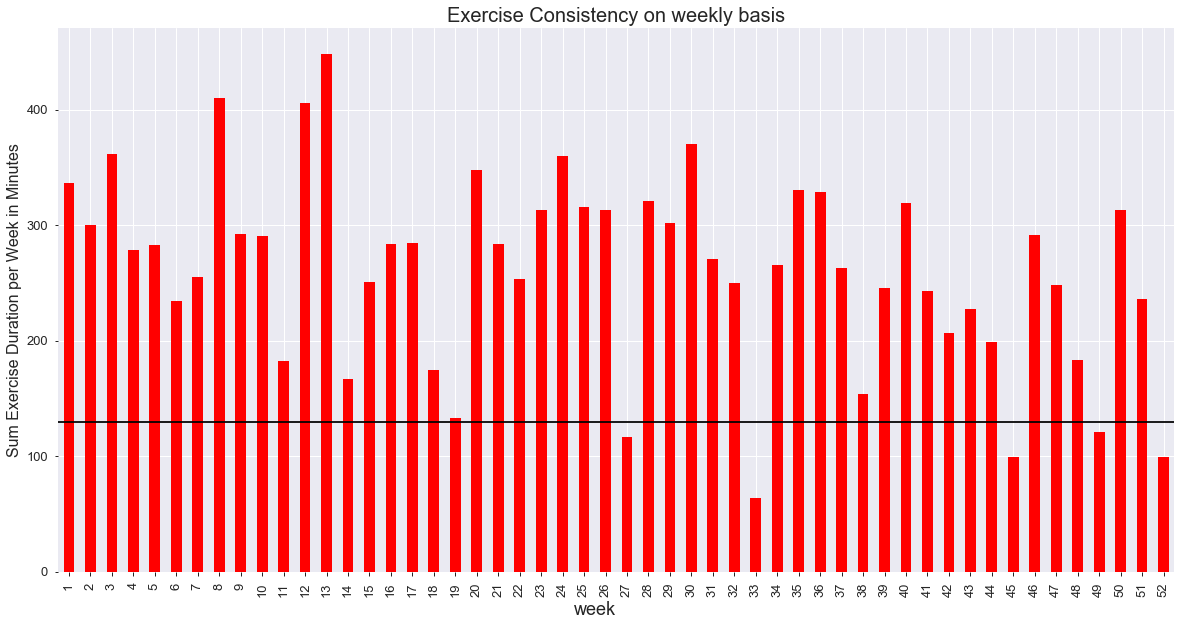

In [10]:
exercise=exercise[exercise.duration > 15]
plt.figure(figsize=(20,10))
plt.ylabel('Sum Exercise Duration per Week in Minutes', fontsize=16)
plt.xlabel('Week', fontsize=18 ,rotation=0, ha='right')
plt.title('Exercise Consistency on weekly basis', fontsize=20)
plt.axhline(y=130, color='black', linestyle='-')
exercise[(exercise['year']==2018)].groupby(['week']).sum()['duration'].plot(kind='bar', fontsize=13, color='red')

## exercise by popularity is pictured below: clearly the individual is mainly dedicated to long Walks.  He/she also does some swimming, and some running and cycling as well. Other types of exercise are less pronounced.


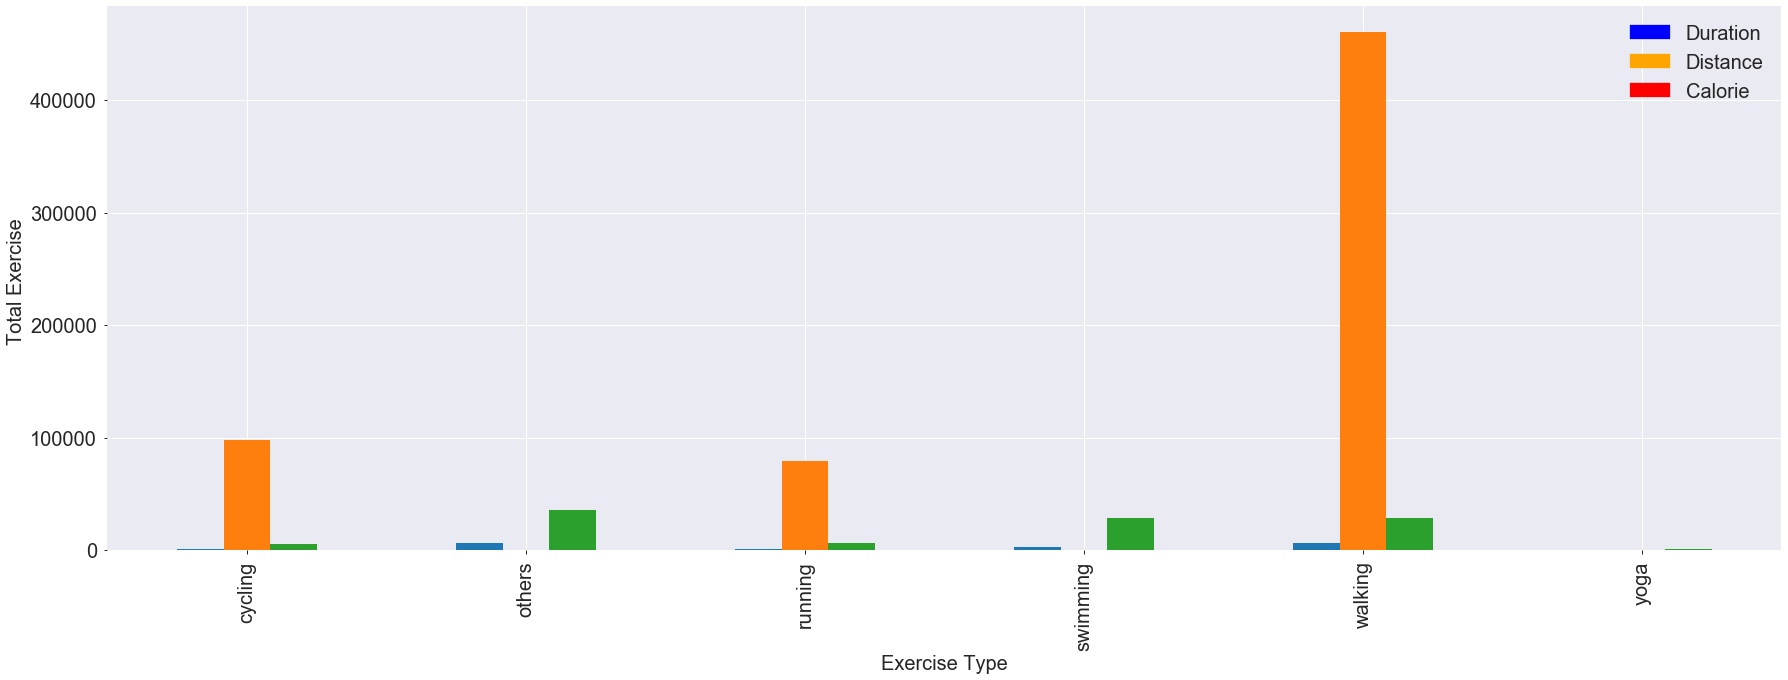

In [11]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
patch1 = mpatches.Patch(color='blue', label='Duration')
patch2 = mpatches.Patch(color='orange', label='Distance')
patch3 = mpatches.Patch(color='red', label='Calorie')
exercise.groupby(['exercise_type']).sum()[['duration','distance','calorie']].plot(kind='bar',figsize=(30,10), fontsize=20)
plt.ylabel('Total Exercise ',size=20)
plt.xlabel('Exercise Type',size=20)
plt.legend(handles=[patch1,patch2,patch3],fontsize=20)
plt.show()

## Pay attention to the four figures below. The bulk of physical activity happens most frequently at  11-13 and again in the afternoons at 21-24, for business days. And similar pattern for the weekends (the second graph below):

In [12]:
plt.figure(figsize = (30,15)) 
exercise[(exercise['weekday'].isin(['Monday','Tuesday','Wednesday','Thursday']))].groupby(['start_hour']).count()['duration'].plot(kind='bar', fontsize=18,  color='red')
#exercise.groupby(['weekday','start_hour']).count()['duration'].plot(kind='bar', fontsize=14,  color='red')
plt.title('Business day exercise frequency by hour of the day', fontsize=30)
plt.ylabel('Exercise Frequency', fontsize=18)
plt.xlabel('Start Hour', fontsize=18)
plt.show()

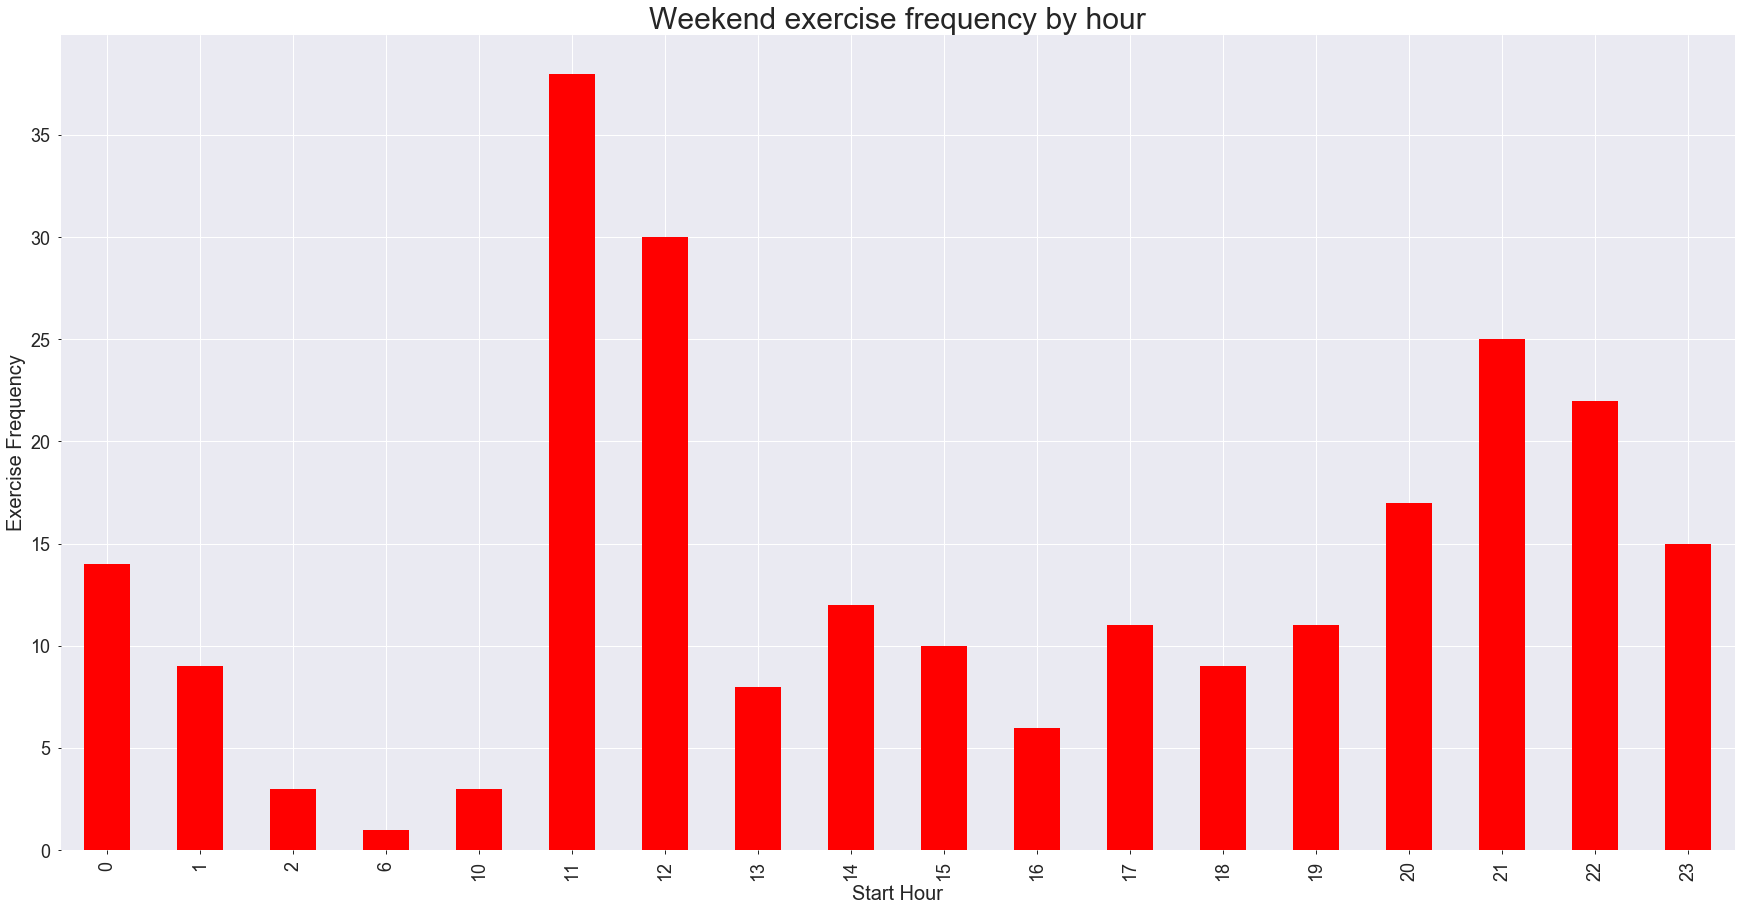

In [181]:
plt.figure(figsize = (30,15)) 
exercise[(exercise['weekday'].isin(['Friday','Saturday','Sunday']))].groupby(['start_hour']).count()['duration'].plot(kind='bar', fontsize=18,  color='red')
plt.title('Weekend exercise frequency by hour', fontsize=30)
plt.ylabel('Exercise Frequency', fontsize=20)
plt.xlabel('Start Hour', fontsize=20)
plt.show()

## Exercise popularity by hour of the day by exercise type

In [13]:
exercise.groupby(['end_hour','exercise_type']).count()['duration'].unstack().plot(kind='bar', fontsize=18, stacked='True')
plt.title('Exercise popularity by hour of the day',fontsize=20)
plt.ylabel('exercise Frequency', fontsize=18)
plt.xlabel('Ending Hour', fontsize=18)
plt.legend(fontsize=20)
plt.gcf().set_size_inches(20, 10)
plt.show()

## Exercise performance does not improve over time (Please play with the parameters isin(["walking"]) and mean()['distance'] to verify that exercise performance does not improve over time for any type of exercise. Thus, the individual does not train for athletic performance, but just health/fitness

In [183]:
plt.figure(figsize=(20,10))
exercise[(exercise['exercise_type'].isin(["walking"]))].groupby(['start_day']).mean()['distance'].plot(kind='bar', color='red', fontsize=12)
plt.xlabel('Time', size=18)
plt.ylabel('Distance (m)', size=18)
plt.title('Distance chronologically',size=20)
plt.show()

## Below, on average, Saturdays in aggregate have registered the highest level of activity in terms of duration, distance and calories.

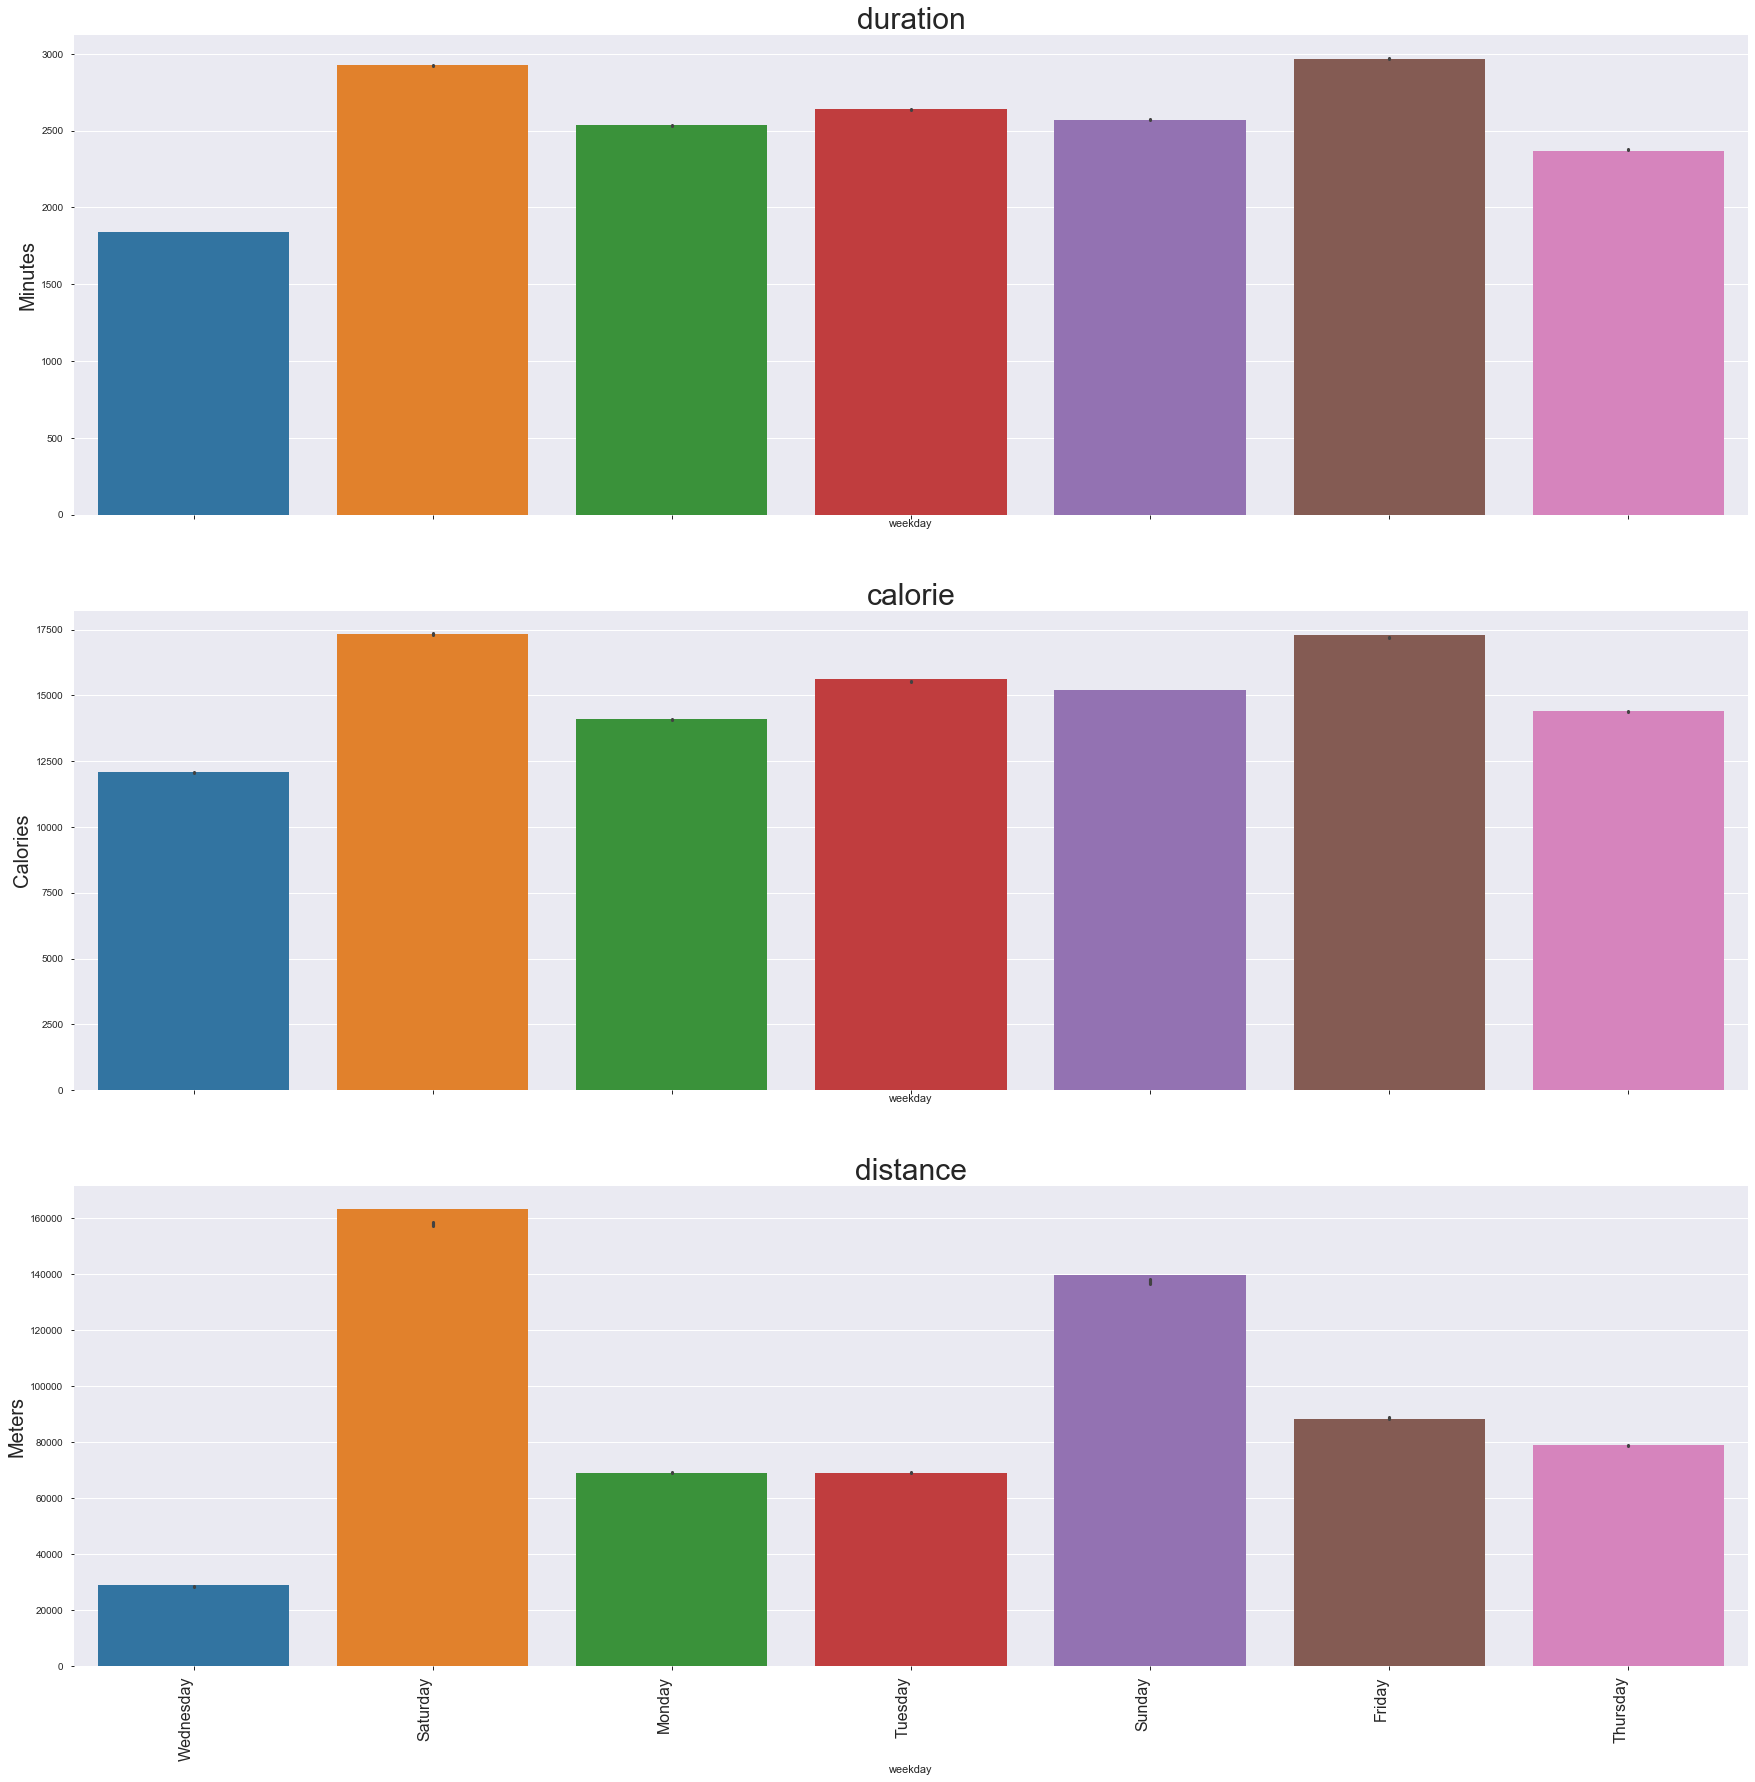

In [74]:
from numpy import mean
fig, axes = plt.subplots(3, 1, figsize=(30, 30), sharex=True)
labels=['Minutes','Calories','Meters']
ax.set_title(name,size=20)
for name, ax, j in zip(['duration', 'calorie', 'distance'], axes, labels):
    sns.barplot(data=exercise,estimator=sum, x='weekday',ci=1.5,  y=name, ax=ax)
    ax.set_title(name, fontsize=30)
    ax.set_ylabel(j, fontsize=20)
    ax.set_xticklabels(labels=exercise['weekday'].unique(), rotation=90, ha='right',size=16)

## The individual is more mobile (walking/running/moving) in UTC-0300 which is fall and winter in Northern Hemisphere. On the other hand, calorie burning activities and exercise duration are more pronounced in UTC-0400 (spring and summer)in Northern Hemisphere

In [75]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
patch1 = mpatches.Patch(color='blue', label='Duration')
patch2 = mpatches.Patch(color='orange', label='Distance')
patch3 = mpatches.Patch(color='red', label='Calorie')
exercise[(exercise['time_offset'].isin(['UTC-0300','UTC-0400']))].groupby(['time_offset']).mean()[['calorie','distance','duration']].plot(kind='bar', figsize=(30,10), fontsize=16)
plt.ylabel('Total Exercise',size=20)
plt.xlabel('Time Offset',size=20)
plt.legend(handles=[patch1,patch2,patch3],fontsize=20)
plt.show()

## chart below shows inconsistency of total quality-sleep per day, there are days when the individual gets less than 300 minutes of quality sleep, and there are days when the person gets over 500 minutes of quality sleep. 

In [14]:
from numpy import mean
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize = (20,10)) 
fig = sns.lineplot(x = "start_day", y = "duration", data = sleep, 
                  estimator = sum, ci =1.5, ax=ax)
ax.set_xticklabels(labels=sleep['start_day'], rotation=90, ha='right')
ax.set_title("Total sleep per day chronologically sorted",size=30)
ax.set_ylabel("Total sleep in Minutes",size=30)
#ax.set.xlabel("Time", fontsize=20)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
#fig.autofmt_xdate()
plt.gcf().autofmt_xdate()
plt.axhline(y=300, color='b', linestyle='-')
plt.axhline(y=500, color='b', linestyle='-')

## weekend sleep surpasses the business day sleep time by 30 minutes on average. But the overall variability is high with some nights getting sleep as low as 300 mins, and some nights as high as 600 minutes. 

In [15]:
sleep['cutomized']=sleep.groupby(['start_day']).sum()['duration']
import plotly.figure_factory as ff
import numpy as np
import plotly.graph_objects as go
hist_data = [sleep[(sleep['weekday'].isin(['Monday','Tuesday','Wednesday', 'Thursday']))].groupby(['start_day']).sum()['duration'],
            sleep[(sleep['weekday'].isin(['Friday','Saturday','Sunday']))].groupby(['start_day']).sum()['duration']]
group_labels = ['Business Day Sleeping Regime', 'Weekends Sleeping Regime']
fig = ff.create_distplot(hist_data, group_labels, bin_size=[5,5])
fig.show()

## Below we can see that the individual's sleep quality is much better (approximately 40 minutes extra) in UTC-0400 (spring & summer in Northern Hemisphere). I have eliminated the UTC-7 from my conclusion, because it only had a few data points.

In [185]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
patch1 = mpatches.Patch(color='blue', label='Duration')
sleep[(sleep['time_offset'].isin(['UTC-0300','UTC-0400']))].groupby(['time_offset']).mean()[['duration']].plot(kind='bar',figsize=(30,10), fontsize=16)
plt.ylabel('Sleep Duration (minutes)',size=20)
plt.xlabel('Time Offset',size=20)
plt.legend(handles=[patch1],fontsize=20)
plt.show()

## The midday naps are 5% less efficient than the night time sleep. 85% vs 90%. Total daily sleep is 225 hours and total nightly is 3239 hours

In [193]:
from numpy import mean
fig, ax = plt.subplots(figsize = (20,10))    
fig = sns.barplot(x = "start_hour", y = "efficiency", data = sleep, 
                  estimator = mean, ci =1.5, ax=ax)
ax.set_xticklabels(labels=sleep['start_hour'].unique(), rotation=90, ha='right')
plt.title("Sleep Efficiency by hour", fontsize=30)
plt.ylabel("Efficiency (%)", fontsize=20)
plt.xlabel("Sleep Hour", fontsize=20)
plt.axvline(x=11, color='b', linestyle='-')
plt.axvline(x=0, color='b', linestyle='-')
plt.show()

In [194]:
print('Night Sleep Efficienccy:' ,sleep[(sleep['start_hour'].isin(['22','23','24','1','2','3','4','5','6','7','8']))].mean()['efficiency'])
print('Day Sleep Efficiency:', sleep[(~sleep['start_hour'].isin(['22','23','24','1','2','3','4','5','6','7','8']))].mean()['efficiency'])
print('Total Night Sleep Duration in hours:' ,sleep[(sleep['start_hour'].isin(['22','23','24','1','2','3','4','5','6','7','8']))].sum()['duration']/60)
print('Total Day Sleep Duration in hours:' ,sleep[(~sleep['start_hour'].isin(['22','23','24','1','2','3','4','5','6','7','8']))].sum()['duration']/60)

Night Sleep Efficienccy: 90.05102217531307
Day Sleep Efficiency: 85.83432357647058
Total Night Sleep Duration in hours: 3238.582277662667
Total Day Sleep Duration in hours: 224.2816575126667


## Below shows the general habit of going to sleep at around 10 pm to 12 midnight on business days, and the occasional post-midnight sleeping occuring on weekends.

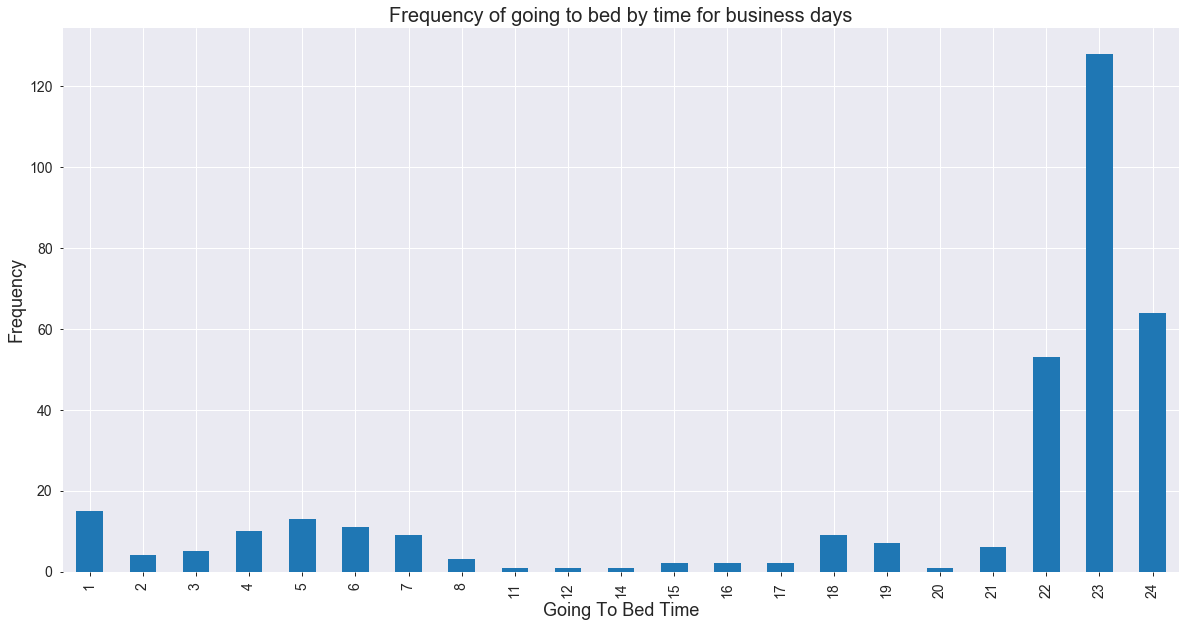

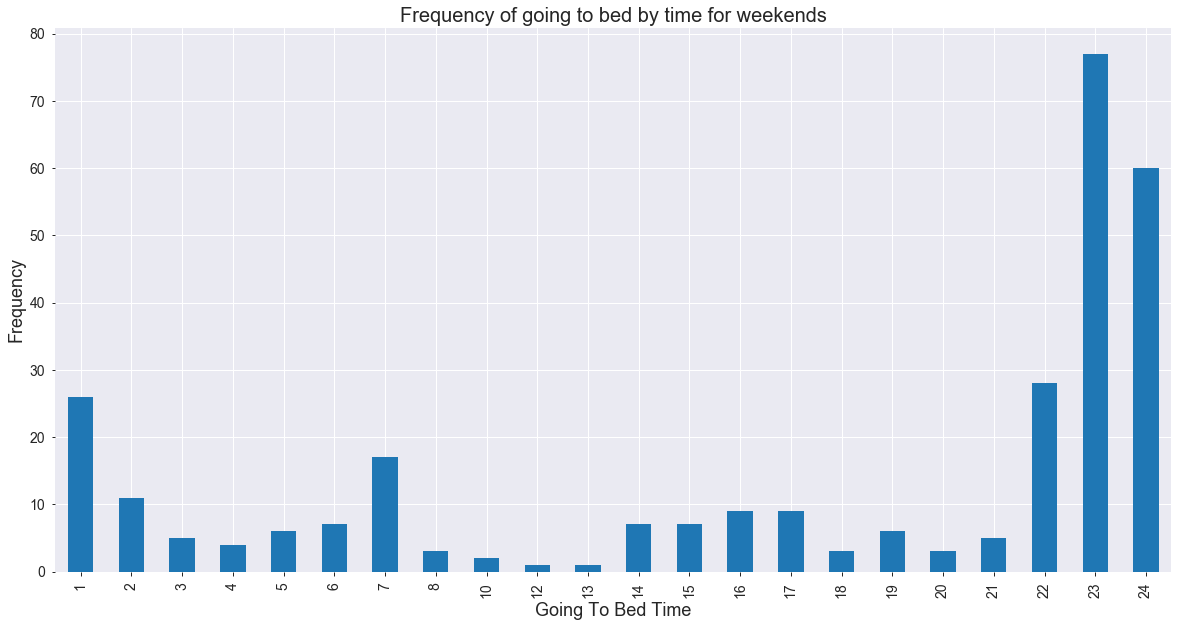

In [195]:
plt.subplots(figsize = (20,10)) 
sleep[(sleep['weekday'].isin(['Monday','Tuesday','Wednesday', 'Thursday']))].groupby('start_hour').count()['duration'].plot(kind='bar', fontsize=14)
plt.title('Frequency of going to bed by time for business days', size=20)
plt.xlabel('Going To Bed Time', size=18)
plt.ylabel('Frequency', size=18)
plt.show()
plt.subplots(figsize = (20,10)) 
sleep[(sleep['weekday'].isin(['Friday', 'Saturday', 'Sunday']))].groupby('start_hour').count()['duration'].plot(kind='bar', fontsize=14)
plt.title('Frequency of going to bed by time for weekends', size=20)
plt.xlabel('Going To Bed Time', size=18)
plt.ylabel('Frequency', size=18)
plt.show()

## Figure below shows inconsistency of floors climbed in a chronological way

In [198]:
plt.figure(figsize=(20,10))
floors_climbed.groupby(['start_day']).sum()['floor'].plot(kind='bar', color='orange', fontsize=12)
plt.xlabel('Time', size=18)
plt.ylabel('Total Elevation (in meters)', size=18)
plt.title('Total Elevation per Day',size=20)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.show()

## The two figures below show floor climbing to be more pronounced on mondays and thursdays.

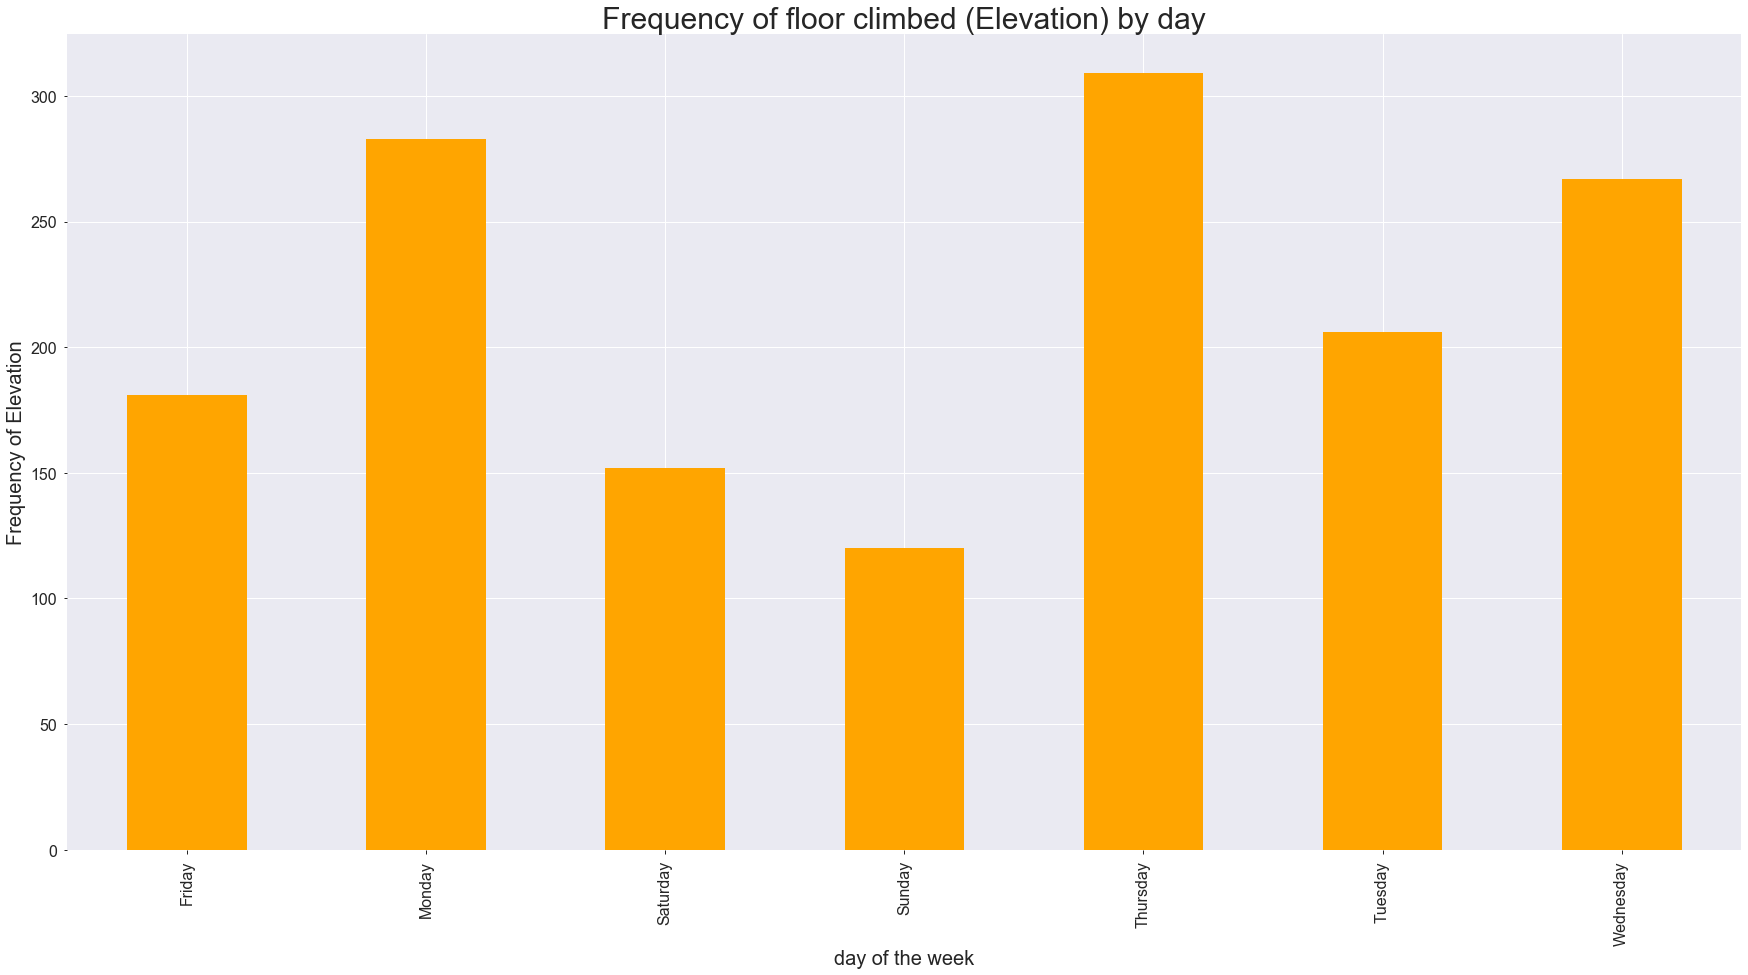

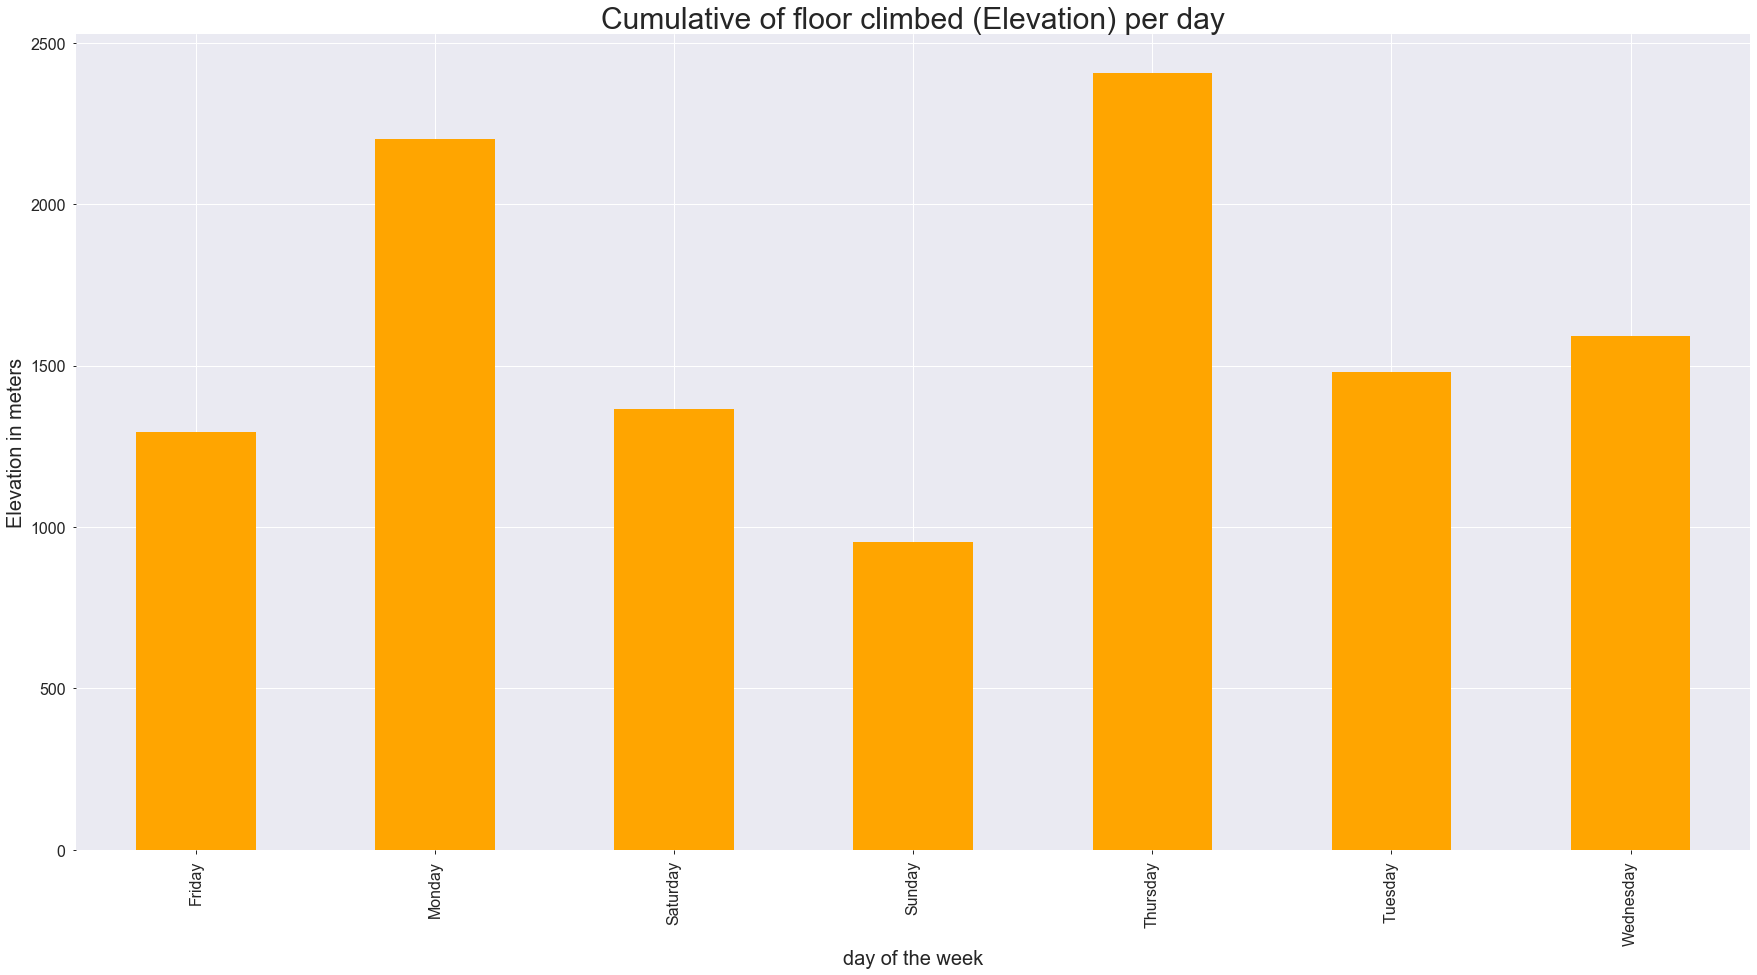

In [209]:
plt.figure(figsize = (30,15)) 
floors_climbed.groupby(['weekday']).count()['floor'].plot(kind='bar', color='orange',fontsize=16)
plt.title('Frequency of floor climbed (Elevation) by day', size=30)
plt.ylabel('Frequency of Elevation', size=20)
plt.xlabel('day of the week', size=20)
plt.show()
plt.figure(figsize = (30,15)) 
floors_climbed.groupby(['weekday']).sum()['floor'].plot(kind='bar', color='orange', fontsize=16)
plt.title('Cumulative of floor climbed (Elevation) per day',size=30)
plt.ylabel('Elevation in meters', size=20)
plt.xlabel('day of the week', size=20)
plt.show()

## The two figures below show climbing to be most frequent and largest in magnitude in 9-11 AM and 18-20 PM.

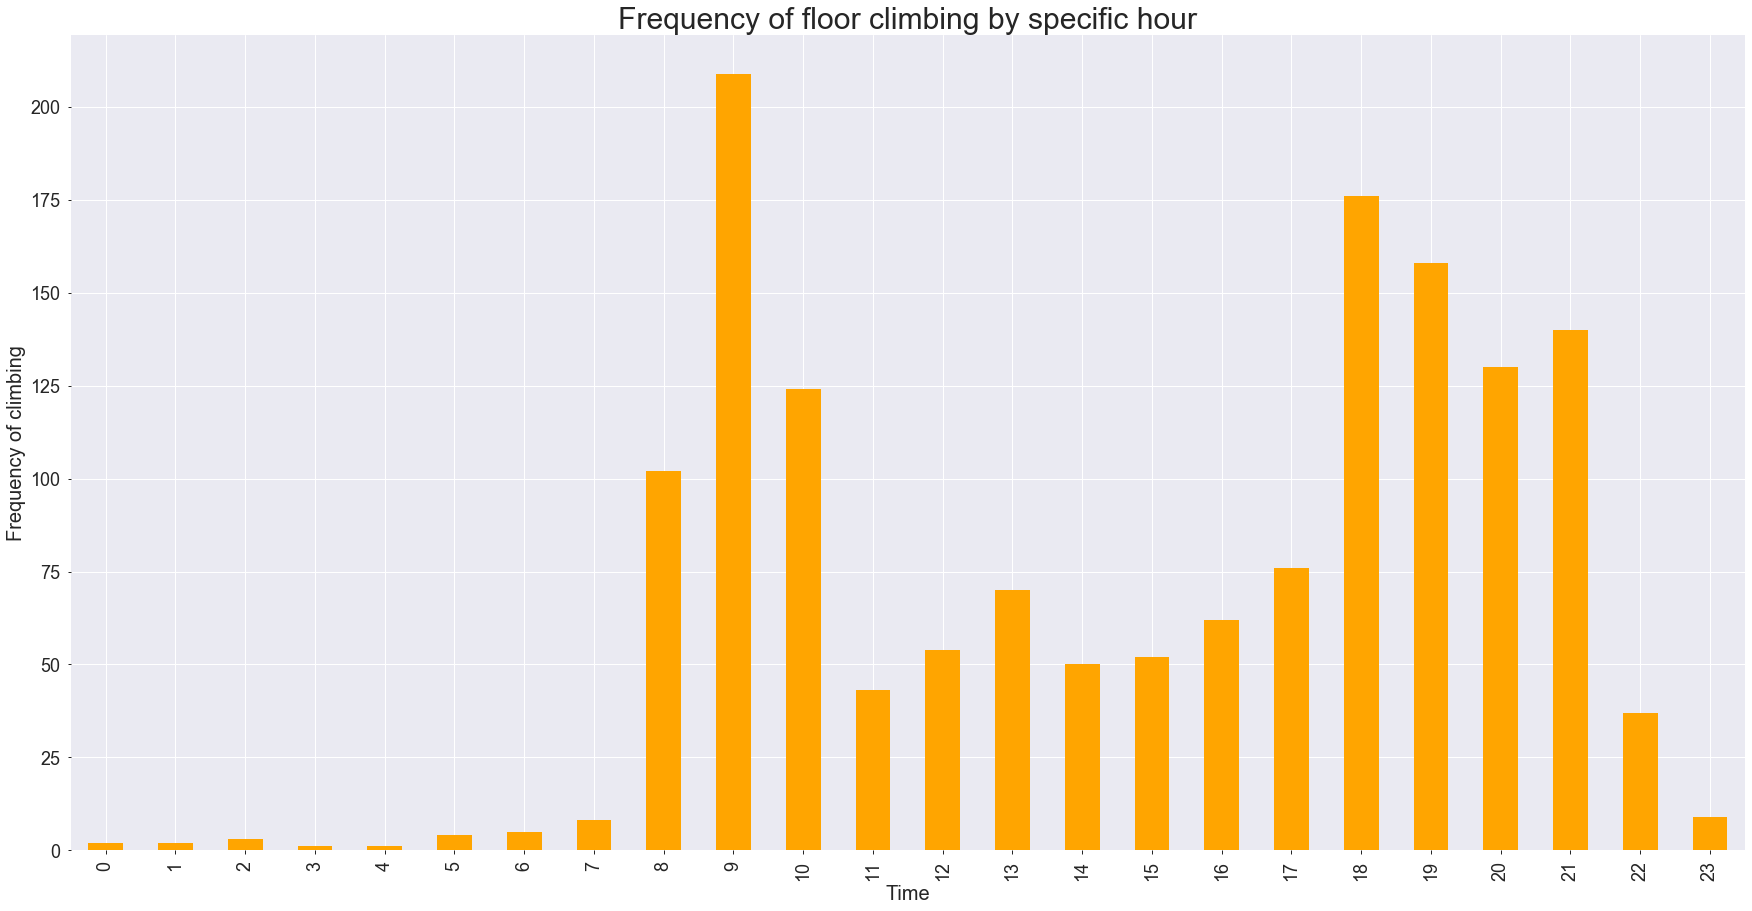

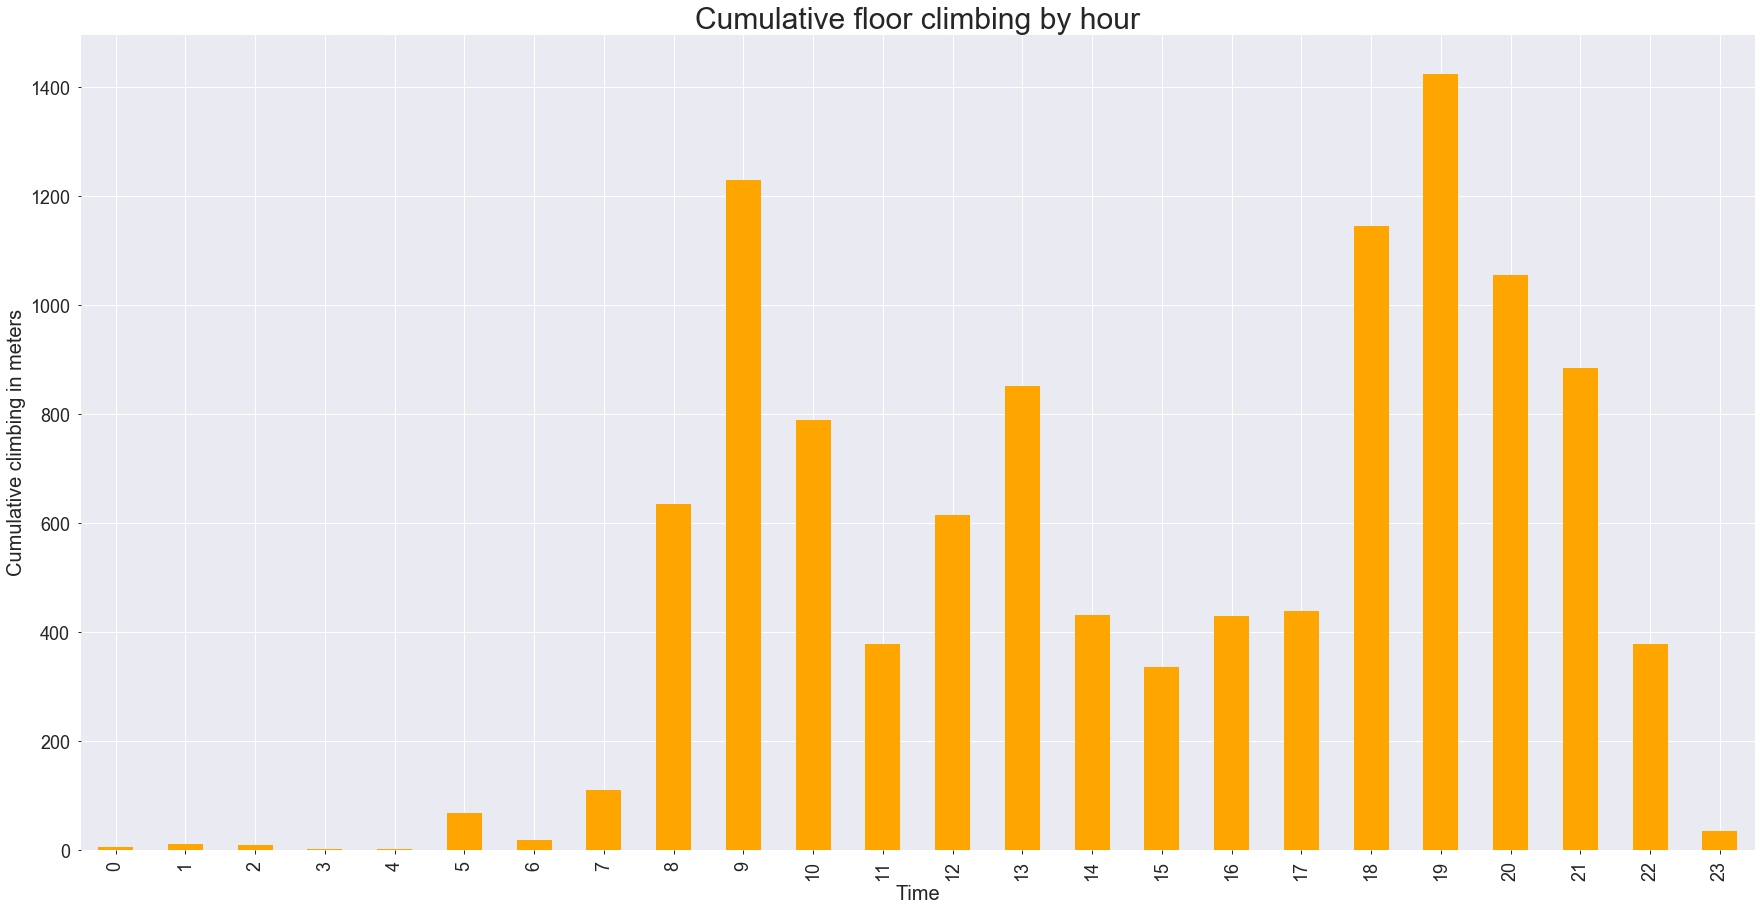

In [121]:
plt.figure(figsize = (30,15)) 
floors_climbed.groupby(['start_hour']).count()['floor'].plot(kind='bar', color='orange', fontsize=18)
plt.title('Frequency of floor climbing by specific hour',size=30)
plt.ylabel('Frequency of climbing',size=20)
plt.xlabel('Time',size=20)
plt.show()

plt.figure(figsize = (30,15)) 
floors_climbed.groupby(['start_hour']).sum()['floor'].plot(kind='bar',color='orange', fontsize=18)
plt.title('Cumulative floor climbing by hour',size=30)
plt.ylabel('Cumulative climbing in meters',size=20)
plt.xlabel('Time',size=20)
plt.show()

## The statistics below shows the individual's moving speed in m/s. It can be observed that the person's speed averages 1.43 m/s and there are also instances of reaching max-speed of 6.94m/s, as verified by the exercise table as well. This reflect that the individual has the physical conditionng (fitness level) to reach fast speeds if desired, although his/her preferred mode of physical activity is walking.

In [199]:
print(step_count['speed'].describe())
step_count.nlargest(15, 'speed')

count    3092.000000
mean        1.858112
std         0.428824
min         1.500000
25%         1.583333
50%         1.708498
75%         1.972222
max         6.527778
Name: speed, dtype: float64


create_time    distance time_offset  count  \
1036 2019-04-08 17:08:32.314   19.200000    UTC-0300     17   
3558 2019-04-18 12:03:31.336    7.500000    UTC-0600      6   
1696 2019-04-12 19:39:20.441   18.640000    UTC-0300     12   
926  2019-04-08 10:30:59.277   11.120000    UTC-0300      8   
6457 2019-04-28 15:31:55.420   20.130000    UTC-0600     16   
3978 2019-04-19 14:54:37.859   22.430000    UTC-0600     16   
3213 2019-04-17 16:54:38.431    9.060000    UTC-0600      8   
2872 2019-04-16 16:31:06.773   20.610000    UTC-0600     16   
2730 2019-04-15 16:43:21.746   15.040000    UTC-0600     13   
6685 2019-04-29 18:06:38.614   28.700000    UTC-0300     29   
8328 2019-05-07 12:57:37.612   16.450000    UTC-0300     16   
6938 2019-04-29 18:20:03.245    9.300000    UTC-0300      8   
7645 2019-05-05 16:27:57.091   14.759999    UTC-0300     14   
3260 2019-04-17 17:22:40.374  106.920000    UTC-0600     88   
4643 2019-04-23 23:35:00.137    8.660000    UTC-0600      9   

                    end_time     speed          start_time  calorie  \
1036 2019-04-08 17:09:00.000  6.527778 2019-04-08 17:08:00     0.87   
3558 2019-04-18 12:04:00.000  5.166666 2019-04-18 12:03:00     0.65   
1696 2019-04-12 19:40:00.000  5.083334 2019-04-12 19:39:00     1.50   
926  2019-04-08 10:30:00.000  4.916666 2019-04-08 10:29:00     0.94   
6457 2019-04-28 15:32:00.000  4.916666 2019-04-28 15:31:00     1.74   
3978 2019-04-19 14:54:00.000  4.888889 2019-04-19 14:53:00     1.90   
3213 2019-04-17 16:37:00.000  4.555555 2019-04-17 16:36:00     0.92   
2872 2019-04-16 16:31:00.000  4.166667 2019-04-16 16:30:00     1.77   
2730 2019-04-15 16:44:00.000  4.138889 2019-04-15 16:43:00     1.07   
6685 2019-04-29 18:04:59.999  4.138889 2019-04-29 18:04:00     1.91   
8328 2019-05-07 12:56:00.000  4.138889 2019-05-07 12:55:00     1.01   
6938 2019-04-29 18:19:00.000  4.083334 2019-04-29 18:18:00     0.81   
7645 2019-05-05 16:28:00.000  4.035899 2019-05-05 16:27:00     0.82   
3260 2019-04-17 17:20:00.000  4.000000 2019-04-17 17:19:00     8.27   
4643 2019-04-23 23:33:00.000  4.000000 2019-04-23 23:32:00     0.46   

      time_offset_adj  start_day  start_hour  month    weekday  
1036              3.0 2019-04-08          17      4     Monday  
3558              6.0 2019-04-18          12      4   Thursday  
1696              3.0 2019-04-12          19      4     Friday  
926               3.0 2019-04-08          10      4     Monday  
6457              6.0 2019-04-28          15      4     Sunday  
3978              6.0 2019-04-19          14      4     Friday  
3213              6.0 2019-04-17          16      4  Wednesday  
2872              6.0 2019-04-16          16      4    Tuesday  
2730              6.0 2019-04-15          16      4     Monday  
6685              3.0 2019-04-29          18      4     Monday  
8328              3.0 2019-05-07          12      5    Tuesday  
6938              3.0 2019-04-29          18      4     Monday  
7645              3.0 2019-05-05          16      5     Sunday  
3260              6.0 2019-04-17          17      4  Wednesday  
4643              6.0 2019-04-23          23      4    Tuesday

## The three figures below show that the person's mobility indictors such as step, distance and calorie vary day by day

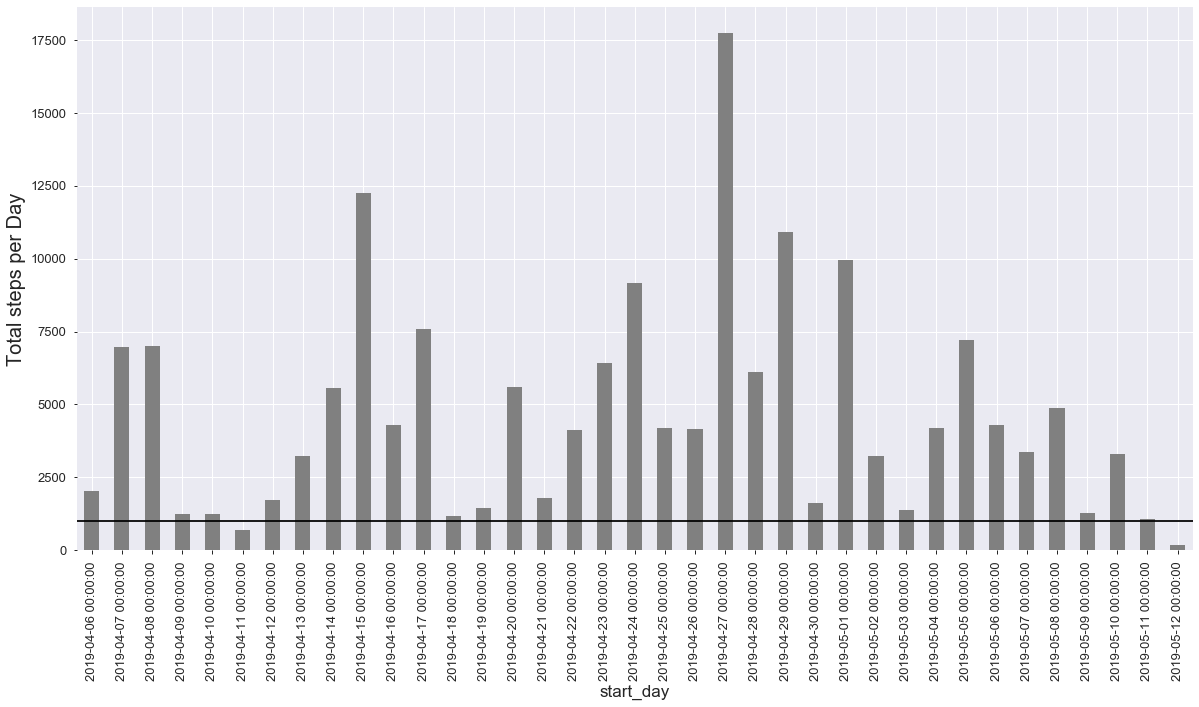

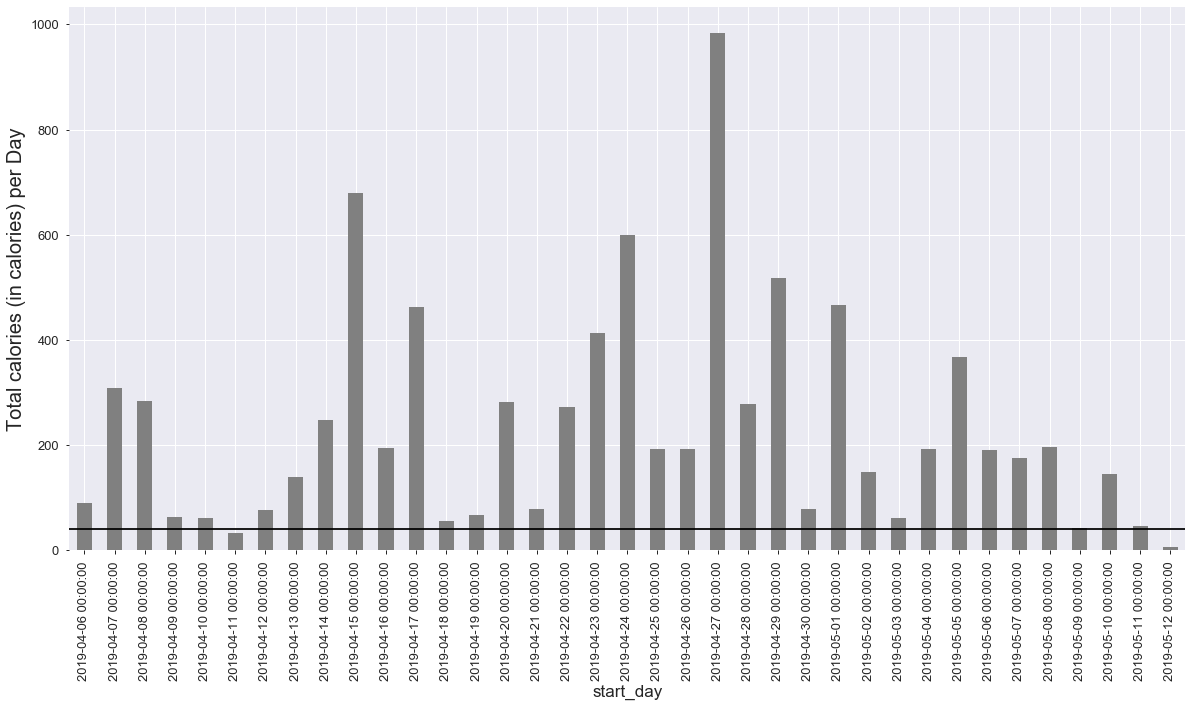

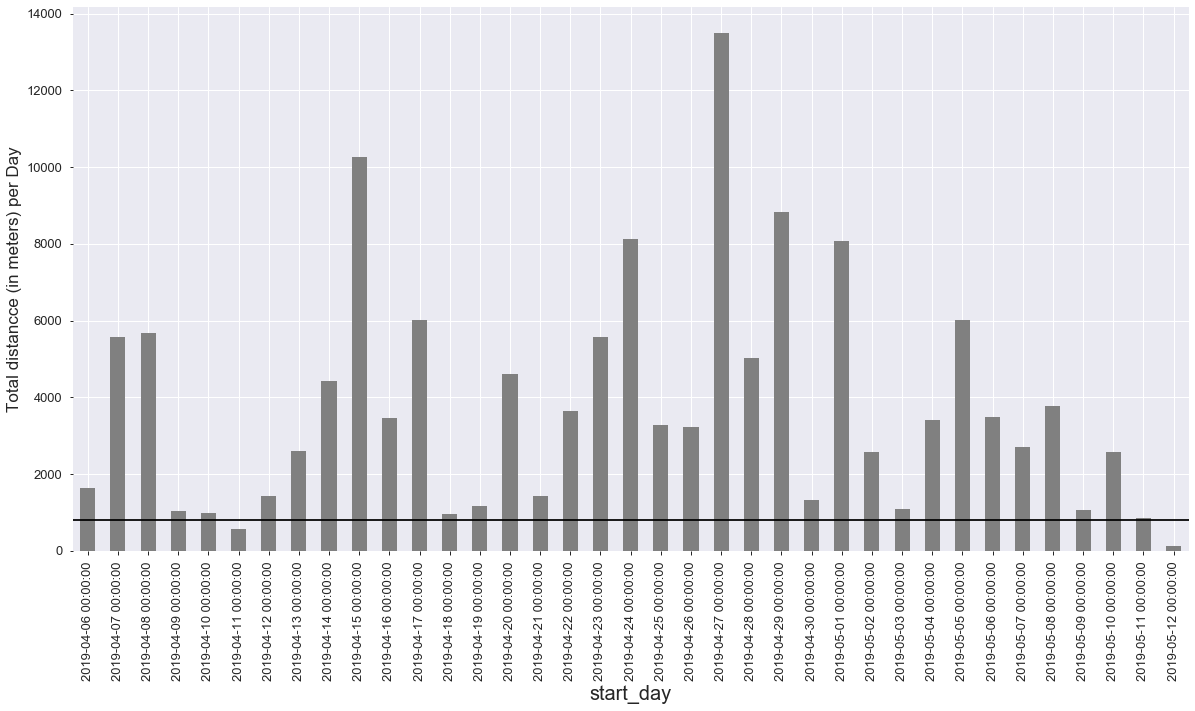

In [200]:
plt.figure(figsize=(20,10))
plt.ylabel('Total steps per Day', size=20)
plt.xlabel('Time', size=17)
plt.axhline(y=1000, color='black', linestyle='-')
step_count.groupby(['start_day']).sum()['count'].plot(kind='bar', fontsize=13, color='grey')
plt.figure(figsize=(20,10))
plt.ylabel('Total calories (in calories) per Day', fontsize=20)
plt.xlabel('Time', size=17)
plt.axhline(y=40, color='black', linestyle='-')
step_count.groupby(['start_day']).sum()['calorie'].plot(kind='bar',fontsize=13, color='grey')
plt.figure(figsize=(20,10))
plt.ylabel('Total distancce (in meters) per Day',size=17)
plt.xlabel('Time', size=20)
plt.axhline(y=800, color='black', linestyle='-')
step_count.groupby(['start_day']).sum()['distance'].plot(kind='bar',fontsize=13, color='grey')

## from the figure below, peak mobility occurs from 14 PM which gradually subsides by midnight, before the person goes to sleep.

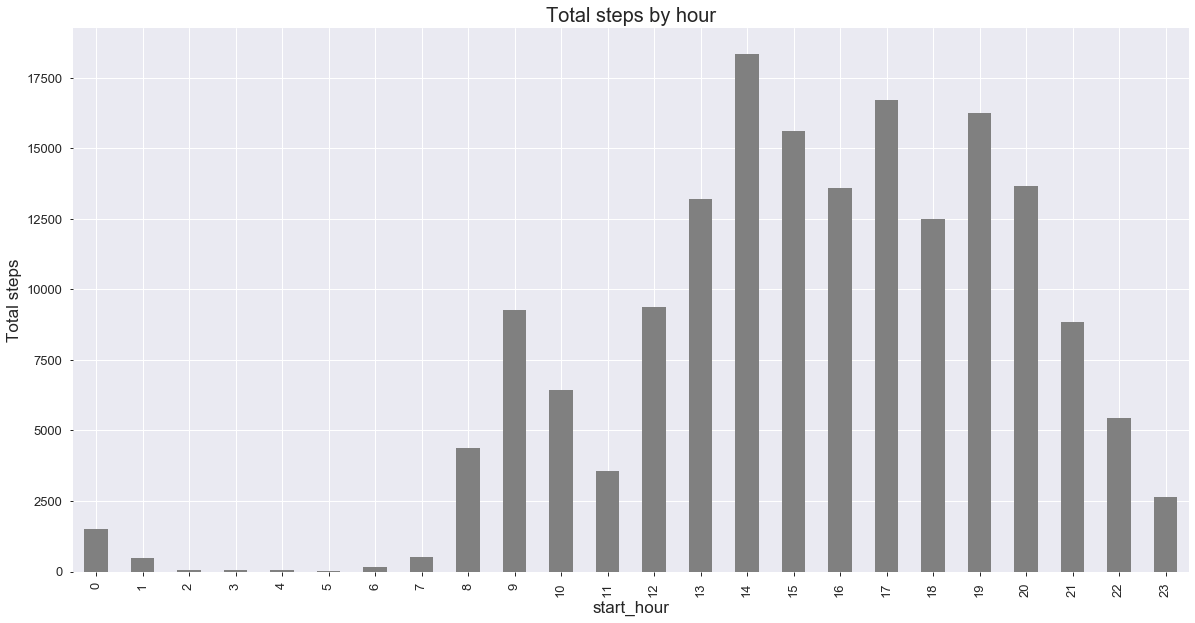

In [201]:
plt.figure(figsize = (20,10)) 
plt.title('Total steps by hour', size=20)
plt.ylabel('Total steps', size=17)
plt.xlabel('Hour', size=17)
step_count.groupby(['start_hour']).sum()['count'].plot(kind='bar',fontsize=13, color='grey')
plt.show()

## There are no particular increasing/decreasing trend on the data.The boxplot below shows that the heart_rate is usually normal and stable when measured. However at some instances it elevates to above 120. In isolation this is a concern, but knowing that the individual is mobile, knwoing that the individual has recorded max heart rates of 220 from the exercise table, knwoing that this person is fit enough to go through one month of recording step data during which some days he/she has walked over 14 km, the high reading of heart_rate from the heart_rate table are not concerning, since they are the exception not the norm

[]

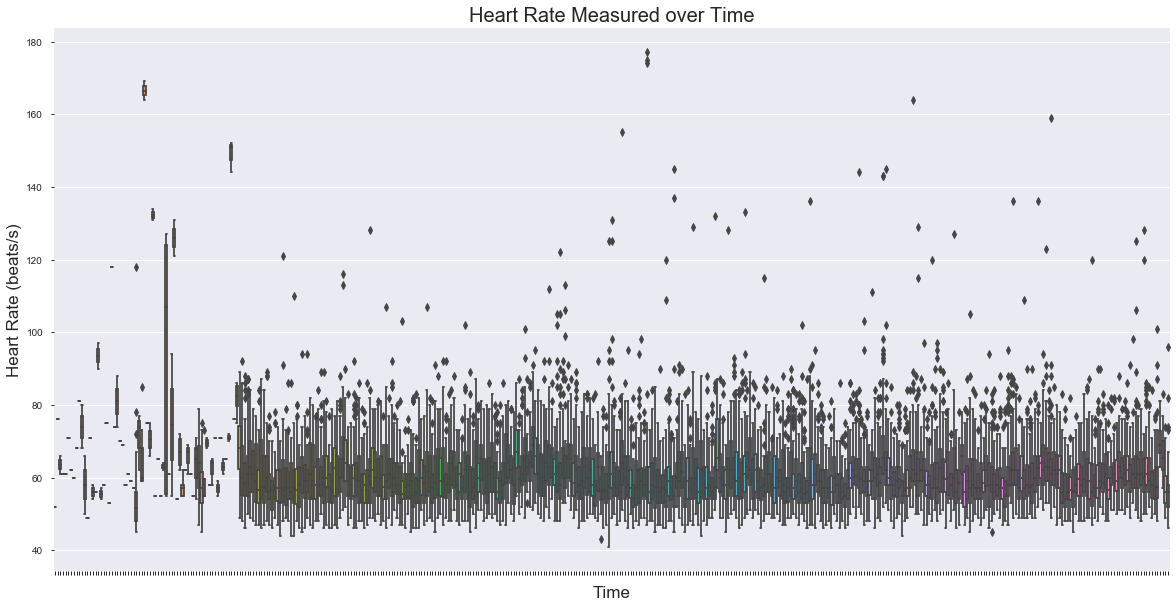

In [202]:
fig, ax = plt.subplots(figsize = (20,10)) 
ax.set_xticklabels(labels=heart_rate['start_day'].unique(), rotation=90, ha='right' ,fontsize=13)
fig = sns.boxplot(x = "start_day", y = "heart_rate", data = heart_rate,   ax=ax)
ax.set_ylabel('Heart Rate (beats/s)',size=17)
ax.set_xlabel('Time', size=17)
ax.set_title('Heart Rate Measured over Time',size=20)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

## The merging of the tables sleep and exercise to verify if they impact each other.

correlation of sleep to exercise is:  -0.0748292906501523


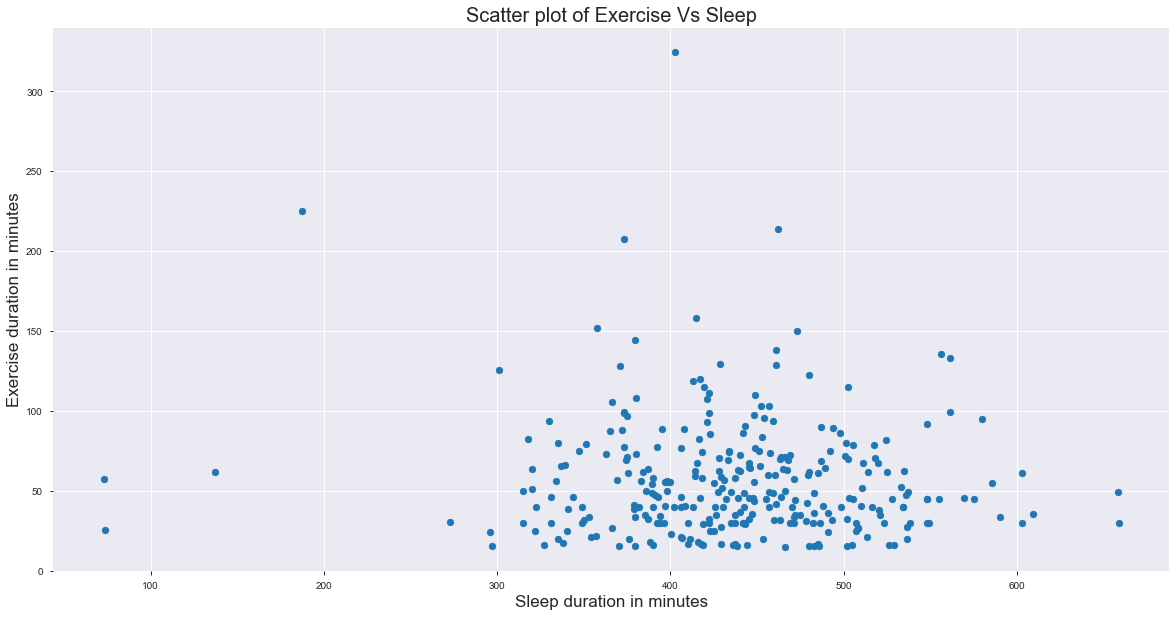

In [128]:
sleep['started']= sleep.created_time.dt.normalize()
data1=sleep.groupby(['started'],as_index=True).sum()['duration']
data1 = data1.to_frame()
exercise['started']=exercise['start_day']
data2=exercise.groupby(['started'],as_index=True).sum()['duration']
data2 = data2.to_frame()
merged_inner=pd.merge(data1, data2, on=['started'], how='inner')
print('correlation of sleep to exercise is: ',merged_inner['duration_x'].corr(merged_inner['duration_y']))
plt.figure(figsize = (20,10))
plt.title('Scatter plot of Exercise Vs Sleep', size=20)
plt.scatter(merged_inner['duration_x'], merged_inner['duration_y'])
plt.ylabel('Exercise duration in minutes',size=17)
plt.xlabel('Sleep duration in minutes',size=17)
plt.show()

## Activity Level (distance,calorie, steps taken) noticeably picks up from late 2017 and on

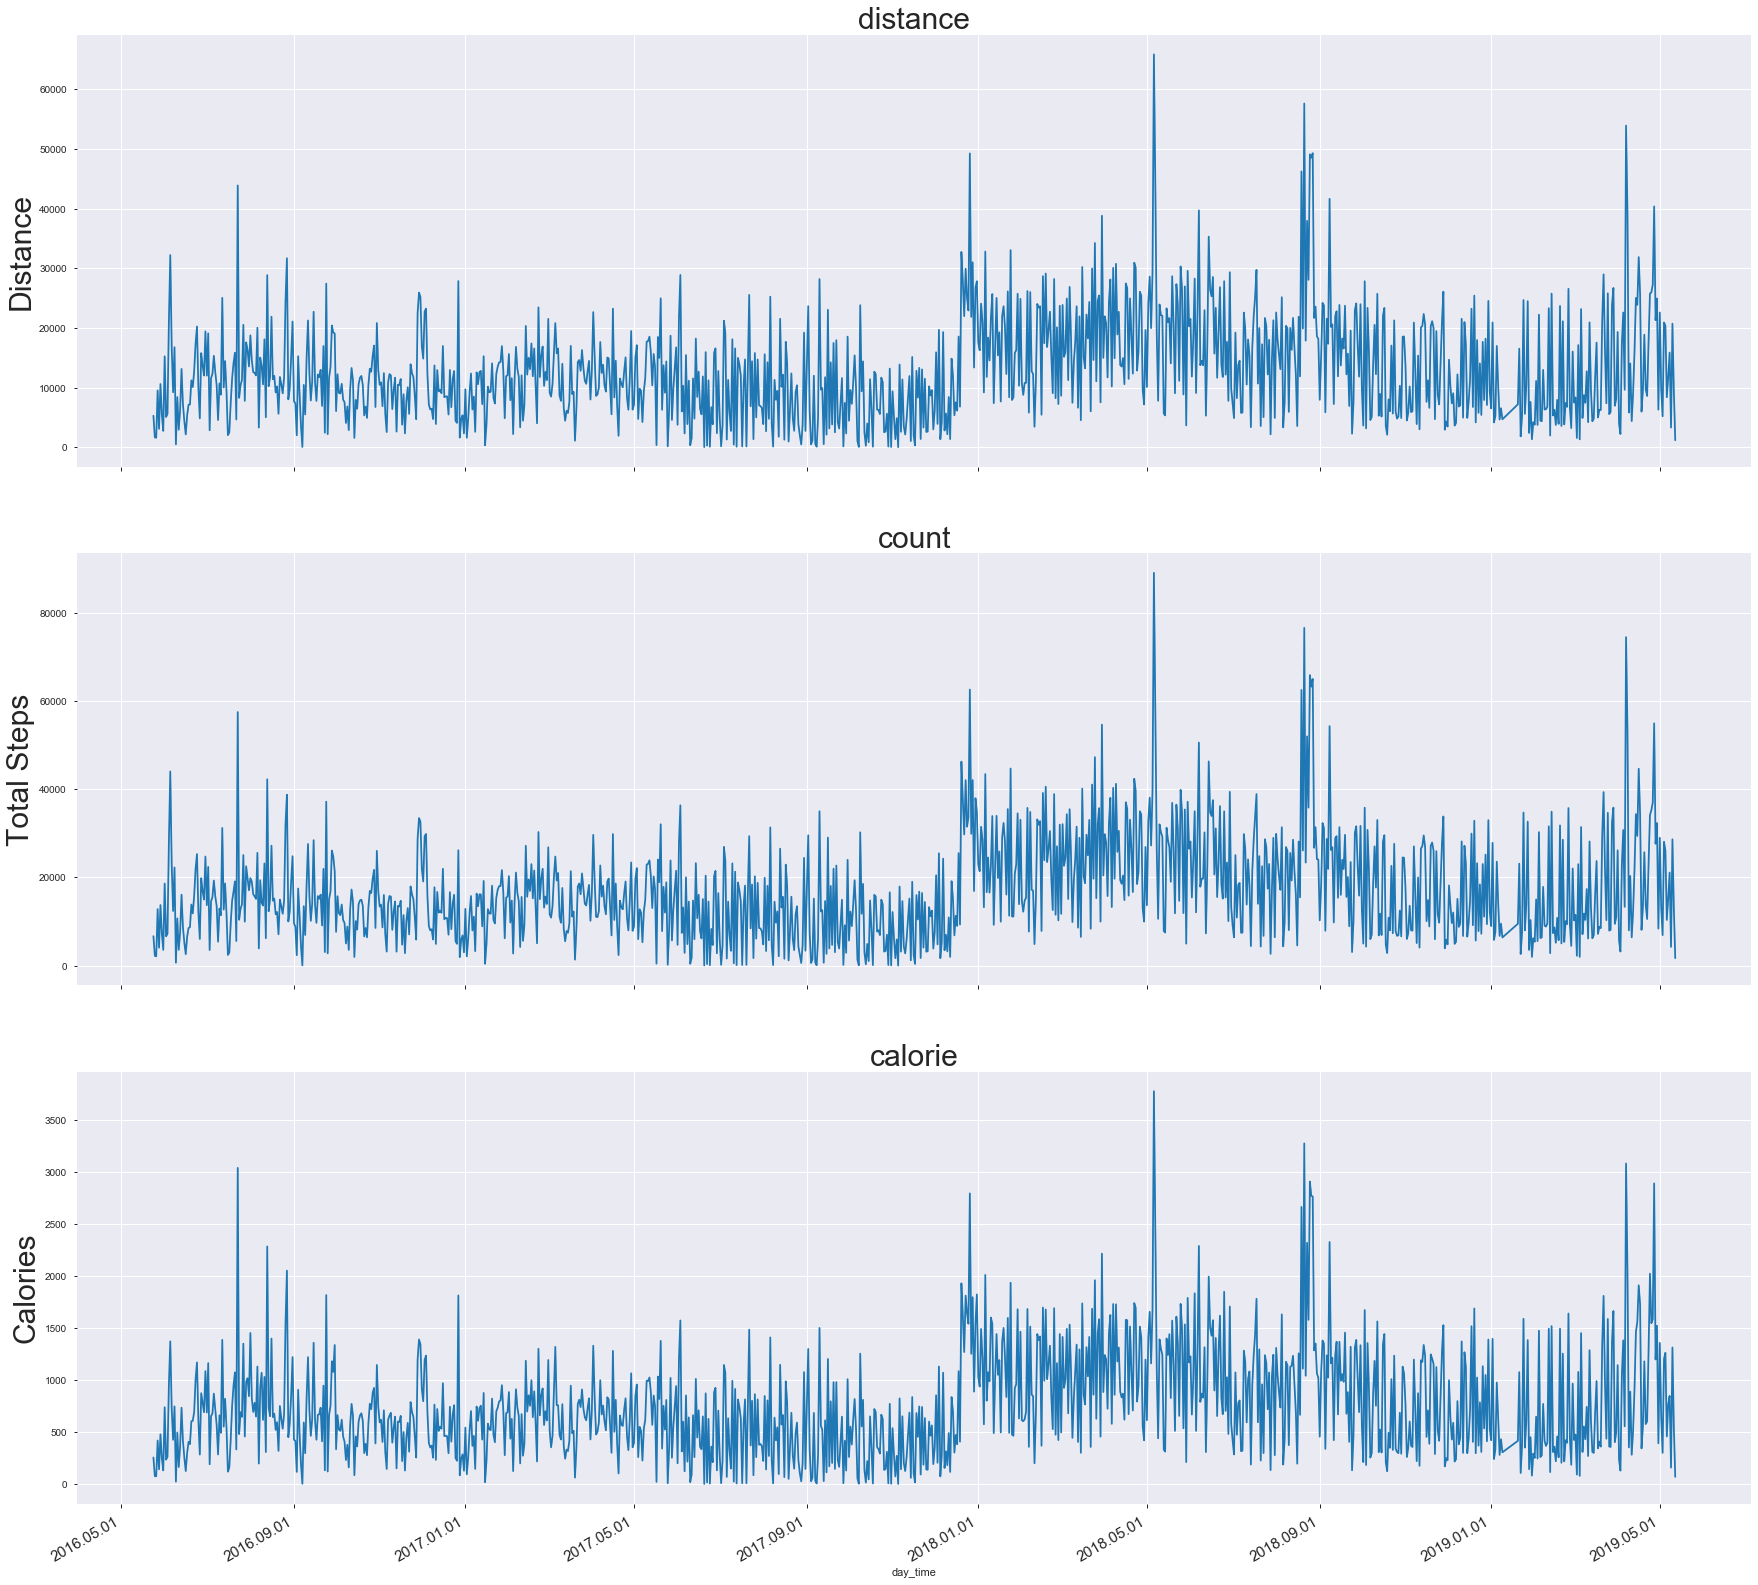

In [203]:
import matplotlib.dates as mdates
fig, axes = plt.subplots(3, 1, figsize=(30, 30), sharex=True)
labels=['Distance','Total Steps','Calories']
for name, ax, j in zip(['distance', 'count', 'calorie'], axes, labels):
    sns.lineplot(data=sdt,estimator=sum, x='day_time',ci=1.5,  y=name, ax=ax)
    ax.set_title(name,size=30)
    ax.set_ylabel(j,size=30)
    ax.set_xticklabels(labels=sdt['day_time'].unique(), rotation=90, ha='right',size=15)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    fig.autofmt_xdate() 

## On Mondays and Wednesdays active calorie burning is increased. 

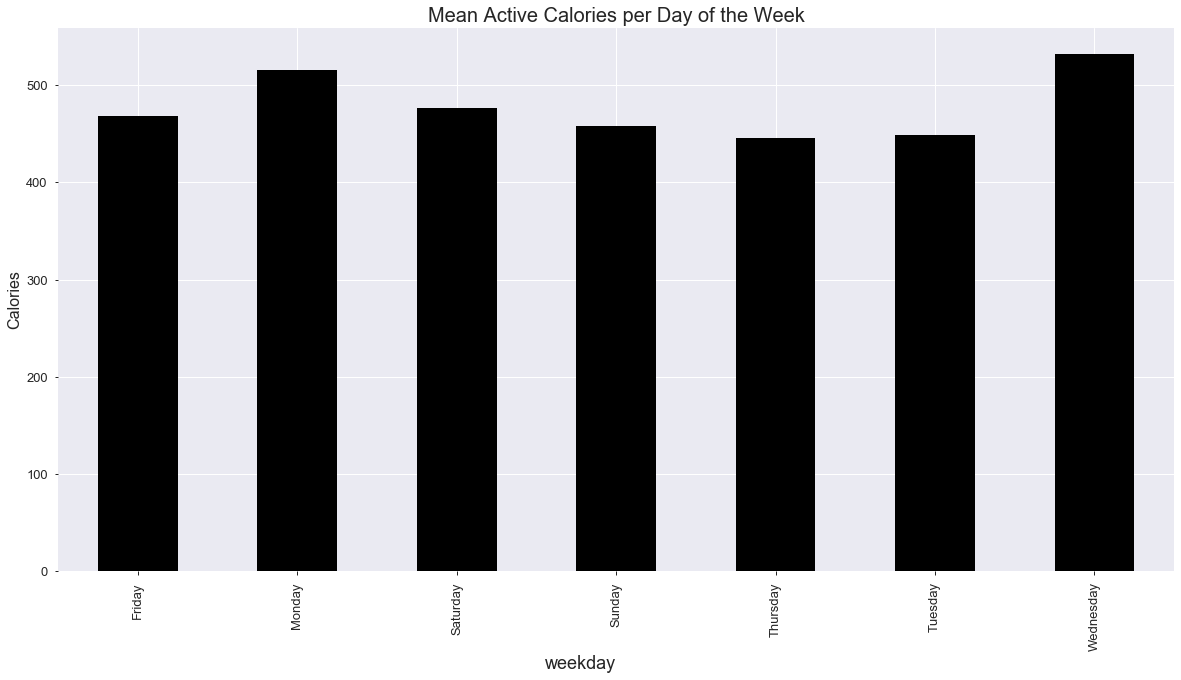

In [133]:
plt.figure(figsize=(20,10))
plt.ylabel('Calories', fontsize=16)
plt.xlabel('Day of Week', fontsize=18 ,rotation=0, ha='right')
plt.title('Mean Active Calories per Day of the Week', fontsize=20)
#plt.axhline(y=130, color='black', linestyle='-')
calories.groupby(['weekday']).mean()['active_calorie'].plot(kind='bar', fontsize=13, color='black')

## There is a cluster of unusually low stress levels registration between Sep 2018 and April 2019.

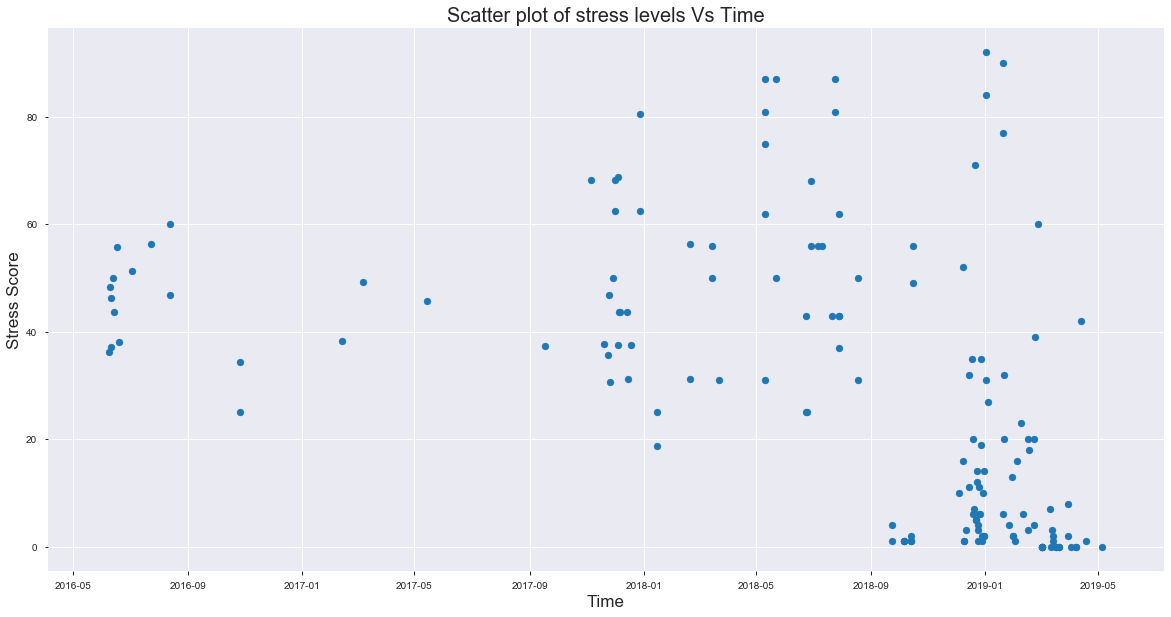

In [154]:
plt.figure(figsize = (20,10))
plt.title('Scatter plot of stress levels Vs Time', size=20)
plt.scatter(stress['start_day'], stress['score'])
plt.ylabel('Stress Score',size=17)
plt.xlabel('Time',size=17)
plt.show()

# Summary #


1-Exercise (duration,calorie,distance) is inconsistent day-by-day.

2-The individual often does 2 times the average exercise recommended weekly, for a healthy adult; In order for us to register an activity as a true exercise, it must last at least 15 minutes. 

3-The individual is mainly dedicated to long Walks. He/she also does some swimming, and some running and cycling as well. Other types of exercise are less pronounced.

4-The bulk of physical activity happens most frequently at 11-13 and again in the afternoons at 21-24, for business days. And similar pattern for the weekends.

5-Exercise performance does not improve over time, so the person does not train for athletic purpose; just regular fitness.

6-Saturdays in aggregate have registered the highest level of activity in terms of duration, distance and calories.

7-The individual is more mobile (walking/running/moving) in UTC-0300 which is fall and winter in Northern Hemisphere. On the other hand, calorie burning activities and exercise duration are more pronounced in UTC-0400 (spring and summer)in Northern Hemisphere.

8-Total sleep per day is inconsistent. There are days registering less than 300 minutes and there are days registering over 500 minutes of quality sleep.

9-Weekend sleep surpasses the business day sleep time by 30 minutes on average.

10-sleep quality is much better (approximately 40 minutes extra) in UTC-0400 (spring & summer in Northern Hemisphere).

11-The midday naps are 5% less efficient than the night time sleep. 85% vs 90%. Total daily sleep is 225 hours and total nightly is 3239 hours.

12-There is a general habit of going to sleep at around 10 pm to 12 midnight on business days, and  occasional post-midnight sleeping on weekends.

13-Floors climbing is inconsistent on day-by-day basis, but is more prnounced on mondays and thursdays.It seems there is a regular weekly engagement on mondays and thursday, perhaps in form of going to a different building, dining out religously, working at 2 seperate office locations, doing shopping on those two days!!!! 

14-Climbing is most frequent and largest in magnitude in 9-11 AM and 18-20 PM.

15-The person's speed averages 1.43 m/s and there are also instances of reaching max-speed of 6.94m/s, as verified by the exercise table as well. This reflect that the individual has the physical conditionng (fitness level or at least is tall) to reach fast speeds if desired, although his/her preferred mode of physical activity is walking.

16-Peak mobility occurs from 14 PM and stays elevated until 20 PM , before meaningfully subsiding by midnight(when the person goes to sleep). If the person had a classic desk job with standard 8-17 business hours, I would have expected the mobility to stay suppressed till 16-17 PM, but that is not the case here.

17-The heart_rate is usually normal and stable when measured. However at some instances it elevates to above 120. In isolation this is a concern, but knowing that the individual is mobile, knwoing that the individual has recorded max heart rates of 220 from the exercise table, knwoing that this person is fit enough to go through one month of recording step data during which some days he/she has walked over 14 km, the high reading of heart_rate from the heart_rate table are not concerning, since they are the exception not the norm.

18-There is no particular correlation between sleep and exercise.

19-The person lifestlye has changed since late 2017, because Activity Level (distance,calorie, steps taken) noticeably picks up from late 2017 and on.

20-On Mondays and Wednesdays active calorie burning is increased.

21-There is a cluster of unusually low stress level registration between Sep 2018 and April 2019, timeoffset confirms a change in time, but I am not sure if that is due to changing location or due to daylight saving.

# Dash Material for future use

In [204]:
import plotly.express as px
import plotly.graph_objects as go

fig=px.scatter_3d(sdt, x='day_time', y='distance', z='calorie', opacity=0.8, size_max=10, color='calorie')
fig.show()

In [372]:
import plotly.express as px
import plotly.graph_objects as go
#fig = go.Figure()
fig=px.bar(step_count, x='start_hour', y='count', opacity=0.8)
fig.show()

In [427]:
'''from numpy import mean
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize = (20,10)) 
fig = sns.lineplot(x = "start_day", y = "duration", data = sleep, 
                  estimator = sum, ci =1.5, ax=ax)
ax.set_xticklabels(labels=sleep['start_day'], rotation=90, ha='right')
ax.set_title("Total sleep per day chronologically sorted",size=30)
ax.set_ylabel("Total sleep in Minutes",size=30)
#ax.set.xlabel("Time", fontsize=20)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
#fig.autofmt_xdate()
plt.gcf().autofmt_xdate()'''

#fig=px.bar(sleep, x='s', y='start_hour', opacity=0.8, colors=start_hour)


import plotly.figure_factory as ff
import numpy as np


hist_data = [sleep['duration']]
group_labels = ['distplot'] # name of the dataset
colors=['darkorange']
fig = ff.create_distplot(hist_data, group_labels,bin_size=10, colors=colors)
fig.update_layout(title_text='Sleep Duration Histogram')
fig.show()



https://plot.ly/python/distplot/
https://technology.amis.nl/2019/10/16/ordering-rows-in-pandas-data-frame-and-bars-in-plotly-bar-chart-by-day-of-the-week-or-any-other-user-defined-order/
https://plot.ly/python/line-charts/
https://towardsdatascience.com/introduction-to-interactive-time-series-visualizations-with-plotly-in-python-d3219eb7a7af
https://plot.ly/python/multiple-transforms/